<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/DL/Lesson%203.%20RNN%20(LSTM%2C%20GRU%2C%20BiRNN)/3_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_RNN_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0%D1%85_%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B8_%D0%B5%D1%81%D1%82%D0%B5%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D1%8F%D0%B7%D1%8B%D0%BA%D0%B0_(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Практика RNN в задачах NLP

## Введение в NLP и RNN

Обработка естественного языка (NLP) — это область искусственного интеллекта, сосредоточенная на взаимодействии между компьютерами и людьми с использованием естественного языка. Задачи NLP включают в себя:

- **Классификация текстов** (например, определение тональности)
- **Генерация текста** (например, создание описаний или резюме)
- **Перевод текста** (перевод с одного языка на другой)
- **Анализ последовательностей** (например, определение части речи)

Рекуррентные нейронные сети (RNN) идеально подходят для задач NLP, так как они могут обрабатывать последовательные данные и учитывать контекст предыдущих элементов последовательности. В рамках данной лекции мы рассмотрим несколько архитектур RNN, таких как простая RNN, LSTM, GRU, Bidirectional RNN и их гибриды.

## Задачи NLP, решаемые с помощью RNN

1. **Классификация текстов**: Определение категории текста (например, новостная статья, блог и т.д.).
2. **Генерация текста**: Создание текста на основе заданного контекста.
3. **Перевод текста**: Перевод предложений с одного языка на другой.
4. **Извлечение сущностей**: Определение и классификация именованных сущностей в тексте.




## Постановка задачи

### Задача

Мы будем решать задачу классификации текстов на основе их тональности, используя простую рекуррентную нейронную сеть (RNN). Задача состоит в том, чтобы классифицировать отзывы о фильмах как положительные (1) или отрицательные (0).

### Цели проекта:

1. **Сбор данных**: Создание небольшого датасета с отзывами о фильмах.
2. **Предобработка данных**: Очистка и преобразование текстов в формат, подходящий для обучения модели.
3. **Создание модели RNN**: Реализация модели для классификации текстов.
4. **Обучение модели**: Обучение модели на тренировочных данных.
5. **Оценка производительности**: Вычисление метрик точности и потерь, а также визуализация результатов.
6. **Оптимизация модели**: Настройка параметров модели для улучшения производительности.




## RNN

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9193 - loss: 0.6453 - val_accuracy: 0.3333 - val_loss: 0.7670
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8438 - loss: 0.5563 - val_accuracy: 0.3333 - val_loss: 0.8284
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8220 - loss: 0.5056 - val_accuracy: 0.3333 - val_loss: 0.8977
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.3333 - loss: 0.7670
Тестовая точность: 0.3333, Тестовые потери: 0.7670


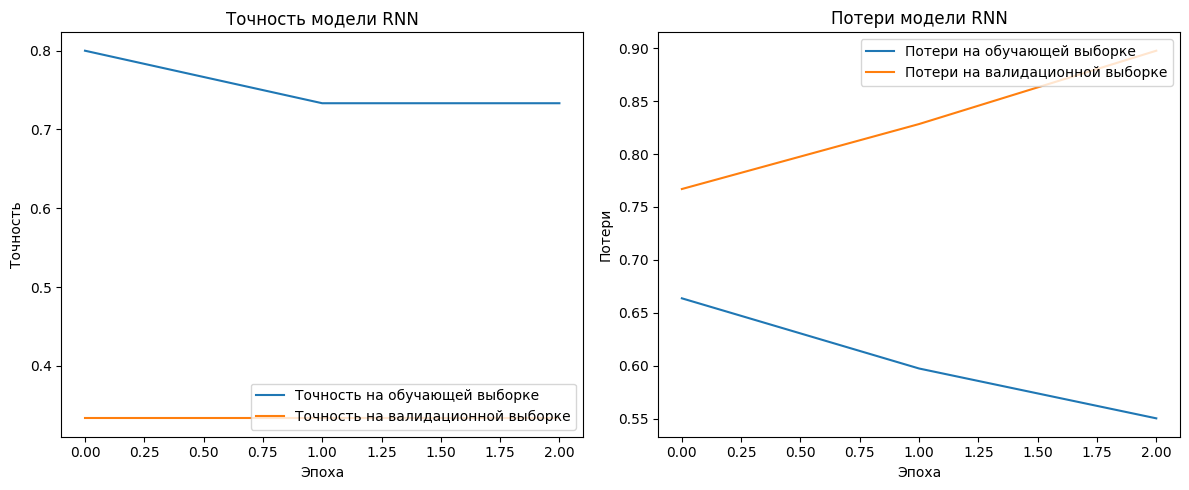

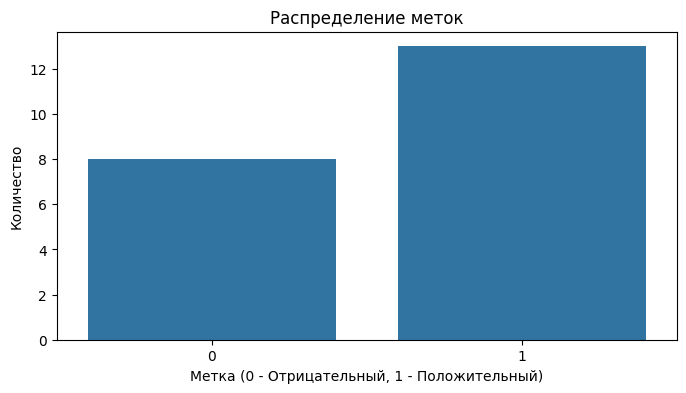

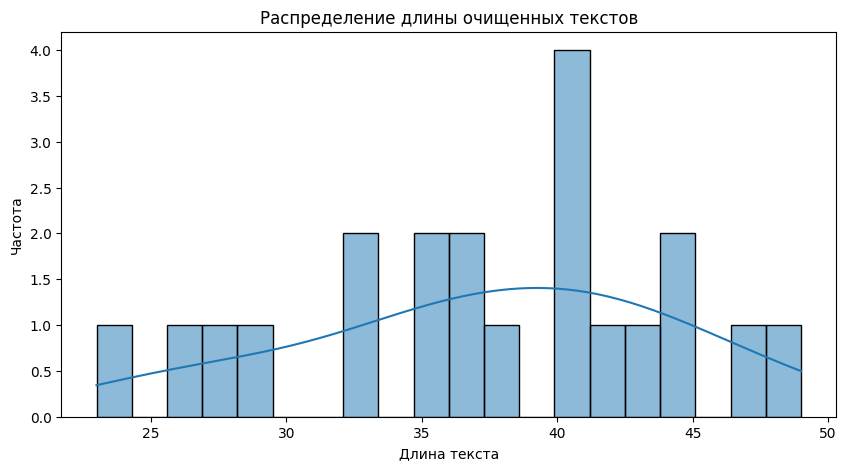

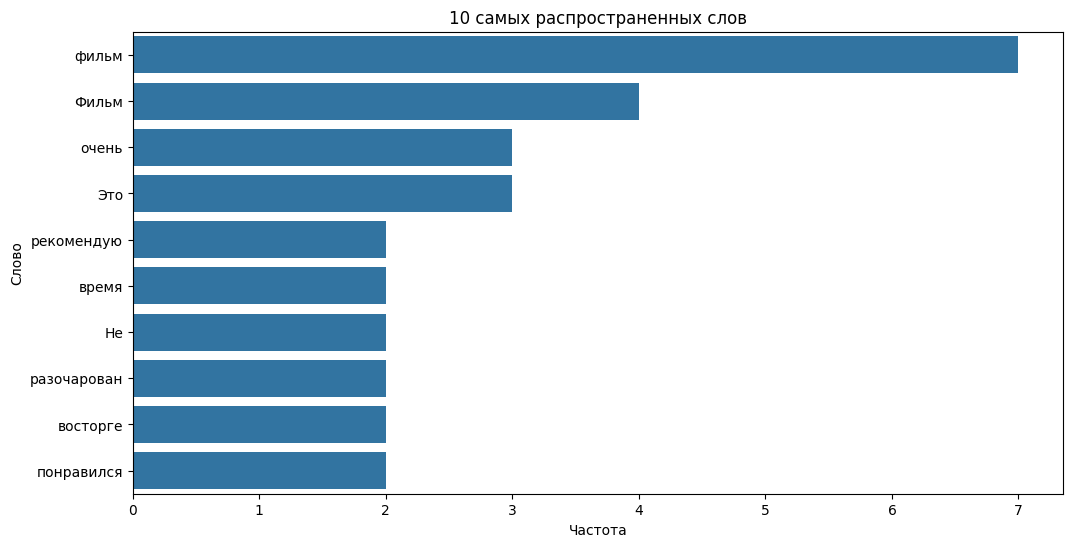

Примеры положительных отзывов:
               Лучший фильм года восторге
        Это шедевр Обязательно пересмотрю
Этот фильм замечательным очень интересным
 Мне понравилась музыка атмосферные сцены
    Сюжет закрученный очень захватывающий

Примеры отрицательных отзывов:
         Не тратьте время фильм ужасен
Зачем снимать такое Сильно разочарован
          Мне понравился фильм скучным
   Полный провал советую тратить время
   Это настоящая катастрофа рекомендую
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Отзыв: "Фильм был отличным, я был в восторге!" - Предсказанная тональность: Положительный
Отзыв: "Совершенно неинтересный, лучше не смотреть." - Предсказанная тональность: Положительный
Отзыв: "Это шедевр! Актеры сыграли великолепно." - Предсказанная тональность: Положительный
Отзыв: "Это настоящая катастрофа, рекомендую." - Предсказанная тональность: Положительный


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
import tensorflow as tf  # Импорт TensorFlow
from nltk.corpus import stopwords
import nltk

# Убедитесь, что стоп-слова загружены
nltk.download('stopwords')

class SentimentAnalysisRNN:
    def __init__(self, data, embedding_dim=8, max_words=100):
        self.data = data
        self.embedding_dim = embedding_dim
        self.max_words = max_words
        self.model = None
        self.tokenizer = None
        self.max_length = None
        self.X_train_pad = None
        self.X_test_pad = None

    def preprocess_data(self):
        # Проверка на совпадение длины списков 'text' и 'label'
        if len(self.data['text']) != len(self.data['label']):
            raise ValueError("Длина списков 'text' и 'label' не совпадает!")

        # Создание DataFrame и предварительная обработка текста
        df = pd.DataFrame(self.data)
        df['text'] = df['text'].str.lower()  # Преобразование в нижний регистр

        # Разделение данных на обучающую и тестовую выборки
        X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.25, random_state=42)

        # Токенизация
        self.tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=self.max_words)
        self.tokenizer.fit_on_texts(X_train)

        # Преобразование текста в последовательности
        X_train_seq = self.tokenizer.texts_to_sequences(X_train)
        X_test_seq = self.tokenizer.texts_to_sequences(X_test)

        # Паддинг
        self.max_length = max(len(x) for x in X_train_seq)
        self.X_train_pad = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=self.max_length, padding='post')
        self.X_test_pad = tf.keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=self.max_length, padding='post')

        return y_train, y_test

    def clean_text(self, text):
        # Удаление нежелательных символов и преобразование в нижний регистр
        text = re.sub(r'[@#$%^&*()_+=\-.,!?]', '', text)  # Удаление специальных символов
        text = re.sub(r'\s+', ' ', text)  # Удаление лишних пробелов
        text = text.strip()  # Удаление пробелов в начале и конце
        return text

    def perform_eda(self):
        # Создание DataFrame для анализа
        df = pd.DataFrame(self.data)

        # Применение предварительной обработки текста
        df['cleaned_text'] = df['text'].apply(self.clean_text)

        # Удаление стоп-слов
        stop_words = set(stopwords.words('russian'))
        df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

        # 1. Распределение меток
        plt.figure(figsize=(8, 4))
        sns.countplot(x='label', data=df)
        plt.title('Распределение меток')
        plt.xlabel('Метка (0 - Отрицательный, 1 - Положительный)')
        plt.ylabel('Количество')
        plt.show()

        # 2. Статистика длины текстов
        df['text_length'] = df['cleaned_text'].str.len()
        plt.figure(figsize=(10, 5))
        sns.histplot(df['text_length'], bins=20, kde=True)
        plt.title('Распределение длины очищенных текстов')
        plt.xlabel('Длина текста')
        plt.ylabel('Частота')
        plt.show()

        # 3. Частота слов
        all_words = ' '.join(df['cleaned_text'])
        word_counts = pd.Series(all_words.split()).value_counts()
        plt.figure(figsize=(12, 6))
        sns.barplot(x=word_counts.values[:10], y=word_counts.index[:10])
        plt.title('10 самых распространенных слов')
        plt.xlabel('Частота')
        plt.ylabel('Слово')
        plt.show()

        # 4. Примеры положительных и отрицательных отзывов
        positive_reviews = df[df['label'] == 1].sample(5, random_state=42)
        negative_reviews = df[df['label'] == 0].sample(5, random_state=42)

        print("Примеры положительных отзывов:")
        print(positive_reviews['cleaned_text'].to_string(index=False))
        print("\nПримеры отрицательных отзывов:")
        print(negative_reviews['cleaned_text'].to_string(index=False))

    def build_model(self):
        # Параметры модели
        vocab_size = len(self.tokenizer.word_index) + 1  # Уникальное количество слов

        # Создание модели RNN
        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Embedding(vocab_size, self.embedding_dim, input_length=self.max_length))  # Слой встраивания
        self.model.add(tf.keras.layers.SimpleRNN(32))  # Рекуррентный слой
        self.model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Выходной слой

        # Компиляция модели
        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    def train_model(self, y_train, y_test):
        # Настройка обратного вызова для ранней остановки
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

        # Обучение модели
        history = self.model.fit(self.X_train_pad, y_train, epochs=10, batch_size=2,
                                 validation_data=(self.X_test_pad, y_test), callbacks=[early_stopping])

        return history

    def evaluate_model(self, y_test):
        # Оценка модели на тестовой выборке
        test_loss, test_accuracy = self.model.evaluate(self.X_test_pad, y_test)
        print(f"Тестовая точность: {test_accuracy:.4f}, Тестовые потери: {test_loss:.4f}")

    def plot_metrics(self, history):
        # График точности
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
        plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
        plt.title('Точность модели RNN')
        plt.ylabel('Точность')
        plt.xlabel('Эпоха')
        plt.legend(loc='lower right')

        # График потерь
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Потери на обучающей выборке')
        plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
        plt.title('Потери модели RNN')
        plt.ylabel('Потери')
        plt.xlabel('Эпоха')
        plt.legend(loc='upper right')

        plt.tight_layout()
        plt.show()

    def predict_sentiment(self, new_reviews):
        # Токенизация и паддинг для новых данных
        new_reviews_seq = self.tokenizer.texts_to_sequences(new_reviews)
        new_reviews_pad = tf.keras.preprocessing.sequence.pad_sequences(new_reviews_seq, maxlen=self.max_length, padding='post')

        # Прогнозирование на новых данных
        predictions = self.model.predict(new_reviews_pad)
        predicted_labels = (predictions > 0.5).astype(int)

        # Вывод результатов
        results = []
        for review, prediction in zip(new_reviews, predicted_labels):
            sentiment = "Положительный" if prediction == 1 else "Отрицательный"
            results.append(f"Отзыв: \"{review}\" - Предсказанная тональность: {sentiment}")

        return results

# Пример использования класса
if __name__ == "__main__":
    data = {
        'text': [
            "Этот фильм был замечательным и очень интересным",  # 1
            "Мне не понравился этот фильм, он был скучным",      # 0
            "Отличная работа актеров и сценарий был великолепным", # 1
            "Не тратьте время на этот фильм, он ужасен",        # 0
            "Фильм мне очень понравился, я буду его смотреть снова", # 1
            "Это была настоящая катастрофа, не рекомендую",     # 0
            "Замечательная комедия, я смеялся весь фильм",       # 1
            "Фильм не оправдал моих ожиданий, разочарован",      # 0
            "Прекрасная работа режиссера, замечательные пейзажи", # 1
            "Сюжет закрученный и очень захватывающий",           # 1
            "Я был в восторге от актерской игры, просто потрясающе!", # 1
            "Не могу поверить, что кто-то может назвать этот фильм хорошим", # 0
            "Фильм оставил яркие впечатления, рекомендую всем!",  # 1
            "Зачем было снимать такое? Сильно разочарован!",      # 0
            "Мне понравилась музыка и атмосферные сцены",         # 1
            "Это было просто ужасно, никогда не пойду на такие фильмы", # 0
            "Это шедевр! Обязательно пересмотрю",                 # 1
            "Полный провал, не советую тратить время",            # 0
            "Хороший фильм для семейного просмотра",              # 1
            "Лучший фильм года, я в восторге!",                   # 1
            "Фильм не такой уж и плохой, есть свои плюсы"        # 1
        ],
        'label': [
            1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
            1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
            1
        ]
    }

    sentiment_model = SentimentAnalysisRNN(data)
    y_train, y_test = sentiment_model.preprocess_data()
    sentiment_model.build_model()
    history = sentiment_model.train_model(y_train, y_test)
    sentiment_model.evaluate_model(y_test)
    sentiment_model.plot_metrics(history)

    # Выполнение EDA
    sentiment_model.perform_eda()

    # Подготовка новых данных
    new_reviews = [
        "Фильм был отличным, я был в восторге!",
        "Совершенно неинтересный, лучше не смотреть.",
        "Это шедевр! Актеры сыграли великолепно.",
        "Это настоящая катастрофа, рекомендую."
    ]

    # Прогнозирование на новых данных
    predictions = sentiment_model.predict_sentiment(new_reviews)
    for result in predictions:
        print(result)

Давайте подробно разберем каждую строку предоставленного кода для анализа тональности с использованием рекуррентной нейронной сети (RNN). Этот код состоит из импортируемых библиотек, класса `SentimentAnalysisRNN`, который содержит методы для обработки данных, построения модели и её обучения, а также основной программы, которая использует этот класс.

### Импорт библиотек

```python
import numpy as np  
```
- Импортирует библиотеку NumPy, которая используется для работы с многомерными массивами и матрицами, а также для выполнения математических операций.

```python
import pandas as pd
```
- Импортирует библиотеку Pandas, которая используется для работы с табличными данными и позволяет удобно манипулировать данными с помощью структур данных, таких как DataFrame.

```python
import matplotlib.pyplot as plt
```
- Импортирует библиотеку Matplotlib, которая используется для визуализации данных. `pyplot` предоставляет функции для создания графиков и диаграмм.

```python
import seaborn as sns
```
- Импортирует библиотеку Seaborn, основанную на Matplotlib, для более красивой визуализации статистических данных. Seaborn делает графики более привлекательными и легкими для понимания.

```python
import re
```
- Импортирует модуль регулярных выражений (regex) для обработки строк, что позволяет выполнять сложные операции поиска и замены.

```python
from sklearn.model_selection import train_test_split
```
- Импортирует функцию `train_test_split` из библиотеки Scikit-learn, которая используется для разделения данных на обучающую и тестовую выборки.

```python
import tensorflow as tf  # Импорт TensorFlow
```
- Импортирует библиотеку TensorFlow, популярный фреймворк для машинного обучения и глубокого обучения. Он будет использоваться для создания и обучения нейронной сети.

```python
from nltk.corpus import stopwords
```
- Импортирует стоп-слова из библиотеки NLTK (Natural Language Toolkit), которые представляют собой распространенные слова, часто исключаемые из текстов, такие как "и", "в", "на" и т. д.

```python
import nltk
```
- Импортирует саму библиотеку NLTK, которая предоставляет инструменты для работы с естественным языком.

```python
# Убедитесь, что стоп-слова загружены
nltk.download('stopwords')
```
- Загрузка списка стоп-слов для русского языка. Этот список будет использоваться для фильтрации текста.

### Определение класса SentimentAnalysisRNN

```python
class SentimentAnalysisRNN:
```
- Объявление класса `SentimentAnalysisRNN`, который будет содержать методы для анализа тональности.

```python
def __init__(self, data, embedding_dim=8, max_words=100):
```
- Конструктор класса. `data` — это входные данные, `embedding_dim` — размерность встраивания (обычно используется для представления слов в векторном пространстве), а `max_words` — максимальное количество слов, которое будет использоваться для токенизации.

```python
self.data = data
self.embedding_dim = embedding_dim
self.max_words = max_words
self.model = None
self.tokenizer = None
self.max_length = None
self.X_train_pad = None
self.X_test_pad = None
```
- Инициализация атрибутов класса. Здесь сохраняются данные, размеры встраивания, модель, токенизатор и параметры для паддинга.

### Предобработка данных

```python
def preprocess_data(self):
```
- Определение метода для предобработки данных.

```python
if len(self.data['text']) != len(self.data['label']):
    raise ValueError("Длина списков 'text' и 'label' не совпадает!")
```
- Проверка, совпадают ли длины списков текста и меток. Если нет, выбрасывается ошибка.

```python
df = pd.DataFrame(self.data)
```
- Создание DataFrame из входных данных для удобной обработки.

```python
df['text'] = df['text'].str.lower()  # Преобразование в нижний регистр
```
- Преобразование текста в нижний регистр, чтобы избежать различий в написании (например, "Фильм" и "фильм").

```python
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.25, random_state=42)
```
- Разделение данных на обучающую (75%) и тестовую (25%) выборки.

```python
self.tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=self.max_words)
```
- Создание экземпляра токенизатора с заданным максимальным количеством слов.

```python
self.tokenizer.fit_on_texts(X_train)
```
- Подгонка токенизатора на обучающих данных, что позволяет создать словарь слов.

```python
X_train_seq = self.tokenizer.texts_to_sequences(X_train)
X_test_seq = self.tokenizer.texts_to_sequences(X_test)
```
- Преобразование текста в последовательности чисел, где каждое слово заменяется соответствующим индексом из словаря.

```python
self.max_length = max(len(x) for x in X_train_seq)
```
- Определение максимальной длины последовательностей в обучающем наборе данных.

```python
self.X_train_pad = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=self.max_length, padding='post')
self.X_test_pad = tf.keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=self.max_length, padding='post')
```
- Паддинг последовательностей, чтобы они все имели одинаковую длину. Если длина последовательности меньше максимальной, добавляются нули (или другие заданные символы) в конце.

```python
return y_train, y_test
```
- Возвращение меток для обучающей и тестовой выборок.

### Очистка текста

```python
def clean_text(self, text):
```
- Определение метода для очистки текста от нежелательных символов.

```python
text = re.sub(r'[@#$%^&*()_+=\-.,!?]', '', text)  # Удаление специальных символов
```
- Удаление специальных символов с помощью регулярных выражений.

```python
text = re.sub(r'\s+', ' ', text)  # Удаление лишних пробелов
```
- Удаление лишних пробелов в тексте.

```python
text = text.strip()  # Удаление пробелов в начале и конце
```
- Удаление пробелов в начале и конце текста.

```python
return text
```
- Возвращение очищенного текста.

### Выполнение анализа данных (EDA)

```python
def perform_eda(self):
```
- Определение метода для выполнения разведывательного анализа данных.

```python
df = pd.DataFrame(self.data)
```
- Создание DataFrame для анализа.

```python
df['cleaned_text'] = df['text'].apply(self.clean_text)
```
- Применение метода очистки текста ко всем записям в DataFrame.

```python
stop_words = set(stopwords.words('russian'))
```
- Загрузка стоп-слов для русского языка.

```python
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
```
- Удаление стоп-слов из очищенного текста.

#### Визуализация

```python
# 1. Распределение меток
plt.figure(figsize=(8, 4))
sns.countplot(x='label', data=df)
plt.title('Распределение меток')
plt.xlabel('Метка (0 - Отрицательный, 1 - Положительный)')
plt.ylabel('Количество')
plt.show()
```
- Создание графика распределения меток (положительные и отрицательные отзывы).

```python
# 2. Статистика длины текстов
df['text_length'] = df['cleaned_text'].str.len()
plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=20, kde=True)
plt.title('Распределение длины очищенных текстов')
plt.xlabel('Длина текста')
plt.ylabel('Частота')
plt.show()
```
- Построение гистограммы длины очищенных текстов.

```python
# 3. Частота слов
all_words = ' '.join(df['cleaned_text'])
word_counts = pd.Series(all_words.split()).value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=word_counts.values[:10], y=word_counts.index[:10])
plt.title('10 самых распространенных слов')
plt.xlabel('Частота')
plt.ylabel('Слово')
plt.show()
```
- Построение графика, отображающего 10 самых распространенных слов.

```python
# 4. Примеры положительных и отрицательных отзывов
positive_reviews = df[df['label'] == 1].sample(5, random_state=42)
negative_reviews = df[df['label'] == 0].sample(5, random_state=42)

print("Примеры положительных отзывов:")
print(positive_reviews['cleaned_text'].to_string(index=False))
print("\nПримеры отрицательных отзывов:")
print(

negative_reviews['cleaned_text'].to_string(index=False))
```
- Выбор случайных примеров положительных и отрицательных отзывов и их вывод.

### Построение модели

```python
def build_model(self):
```
- Определение метода для создания модели.

```python
vocab_size = len(self.tokenizer.word_index) + 1  # Уникальное количество слов
```
- Определение размера словаря (количества уникальных слов).

```python
self.model = tf.keras.models.Sequential()
```
- Создание последовательной модели в Keras.

```python
self.model.add(tf.keras.layers.Embedding(vocab_size, self.embedding_dim, input_length=self.max_length))  # Слой встраивания
```
- Добавление слоя встраивания, который преобразует слова в векторы фиксированной длины.

```python
self.model.add(tf.keras.layers.SimpleRNN(32))  # Рекуррентный слой
```
- Добавление рекуррентного слоя, который будет обрабатывать последовательности.

```python
self.model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Выходной слой
```
- Добавление выходного слоя с сигмоидной активацией для бинарной классификации (положительные или отрицательные отзывы).

```python
self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
```
- Компиляция модели, где указывается функция потерь, оптимизатор и метрики.

### Обучение модели

```python
def train_model(self, y_train, y_test):
```
- Определение метода для обучения модели.

```python
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
```
- Настройка обратного вызова для ранней остановки, чтобы избежать переобучения.

```python
history = self.model.fit(self.X_train_pad, y_train, epochs=10, batch_size=2,
                         validation_data=(self.X_test_pad, y_test), callbacks=[early_stopping])
```
- Обучение модели на подготовленных данных. Указаны количество эпох, размер пакета и данные для валидации.

```python
return history
```
- Возвращение истории обучения (показатели точности и потерь).

### Оценка модели

```python
def evaluate_model(self, y_test):
```
- Определение метода для оценки модели на тестовой выборке.

```python
test_loss, test_accuracy = self.model.evaluate(self.X_test_pad, y_test)
```
- Оценка модели и получение значений потерь и точности.

```python
print(f"Тестовая точность: {test_accuracy:.4f}, Тестовые потери: {test_loss:.4f}")
```
- Вывод результатов оценки.

### Визуализация метрик

```python
def plot_metrics(self, history):
```
- Определение метода для визуализации метрик обучения.

```python
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
plt.title('Точность модели RNN')
plt.ylabel('Точность')
plt.xlabel('Эпоха')
plt.legend(loc='lower right')
```
- Построение графика для точности на обучающей и валидационной выборках.

```python
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери на обучающей выборке')
plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
plt.title('Потери модели RNN')
plt.ylabel('Потери')
plt.xlabel('Эпоха')
plt.legend(loc='upper right')
```
- Построение графика для потерь на обучающей и валидационной выборках.

```python
plt.tight_layout()
plt.show()
```
- Упаковка графиков и отображение их.

### Прогнозирование тональности

```python
def predict_sentiment(self, new_reviews):
```
- Определение метода для предсказания тональности на новых отзывах.

```python
new_reviews_seq = self.tokenizer.texts_to_sequences(new_reviews)
new_reviews_pad = tf.keras.preprocessing.sequence.pad_sequences(new_reviews_seq, maxlen=self.max_length, padding='post')
```
- Токенизация и паддинг новых отзывов для соответствия формату входных данных модели.

```python
predictions = self.model.predict(new_reviews_pad)
predicted_labels = (predictions > 0.5).astype(int)
```
- Прогнозирование тональности новых отзывов и преобразование вероятностей в бинарные метки (0 или 1).

```python
results = []
for review, prediction in zip(new_reviews, predicted_labels):
    sentiment = "Положительный" if prediction == 1 else "Отрицательный"
    results.append(f"Отзыв: \"{review}\" - Предсказанная тональность: {sentiment}")
```
- Формирование списка результатов, где каждому отзыву соответствует предсказанная тональность.

```python
return results
```
- Возвращение результатов предсказания.

### Пример использования класса

```python
if __name__ == "__main__":
```
- Проверка, запущен ли скрипт как основная программа.

```python
data = {
    'text': [ ... ],
    'label': [ ... ]
}
```
- Задание данных в виде словаря, где `text` — это список отзывов, а `label` — метки тональности.

```python
sentiment_model = SentimentAnalysisRNN(data)
```
- Создание экземпляра класса `SentimentAnalysisRNN` с заданными данными.

```python
y_train, y_test = sentiment_model.preprocess_data()
```
- Вызов метода для предобработки данных и получение меток для обучающей и тестовой выборок.

```python
sentiment_model.build_model()
```
- Вызов метода для построения модели.

```python
history = sentiment_model.train_model(y_train, y_test)
```
- Обучение модели на подготовленных данных.

```python
sentiment_model.evaluate_model(y_test)
```
- Оценка модели на тестовой выборке.

```python
sentiment_model.plot_metrics(history)
```
- Визуализация метрик обучения.

```python
sentiment_model.perform_eda()
```
- Выполнение разведывательного анализа данных.

```python
new_reviews = [ ... ]
```
- Подготовка новых отзывов для прогнозирования.

```python
predictions = sentiment_model.predict_sentiment(new_reviews)
```
- Прогнозирование тональности на новых данных.

```python
for result in predictions:
    print(result)
```
- Вывод результатов предсказания.

Таким образом, код реализует полноценный pipeline для анализа тональности текстов, начиная с предобработки данных, построения и обучения модели, а также визуализации результатов и прогнозирования на новых данных.

## LSTM

Epoch 1/10


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.6427 - loss: 0.6902 - val_accuracy: 0.3333 - val_loss: 0.7046
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8067 - loss: 0.6689 - val_accuracy: 0.3333 - val_loss: 0.7209
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7512 - loss: 0.6534 - val_accuracy: 0.3333 - val_loss: 0.7405
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.3333 - loss: 0.7046
Тестовая точность: 0.3333, Тестовые потери: 0.7046


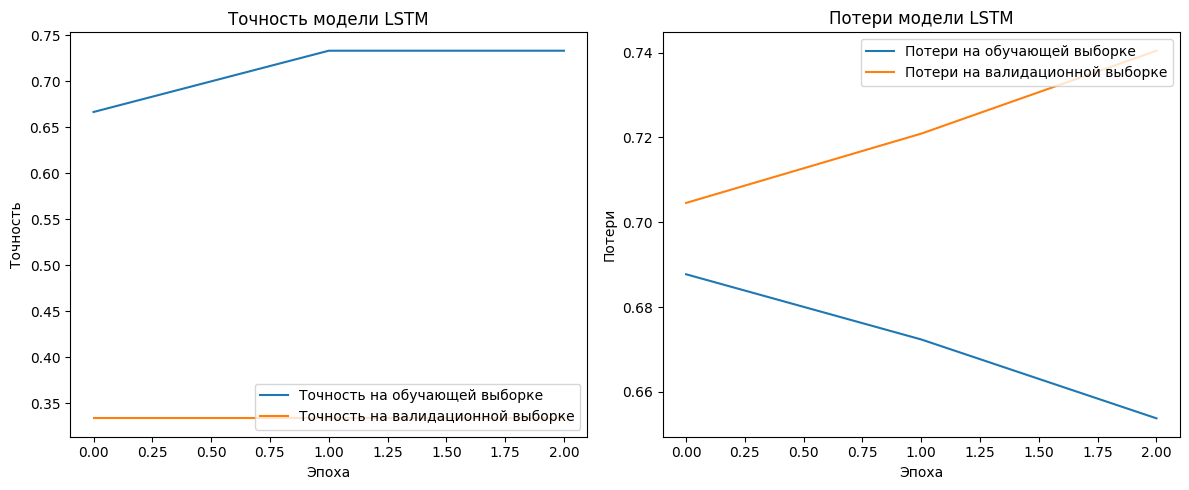

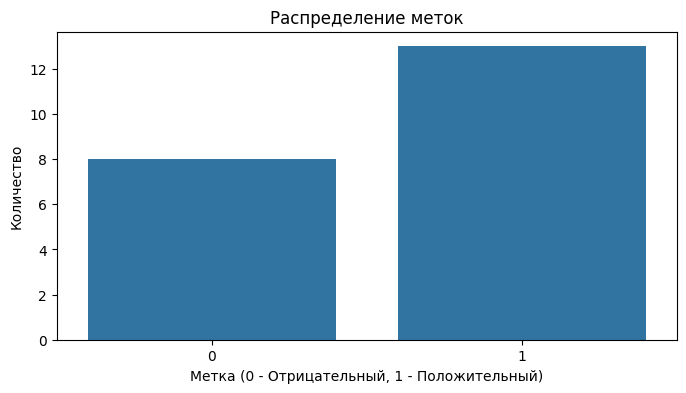

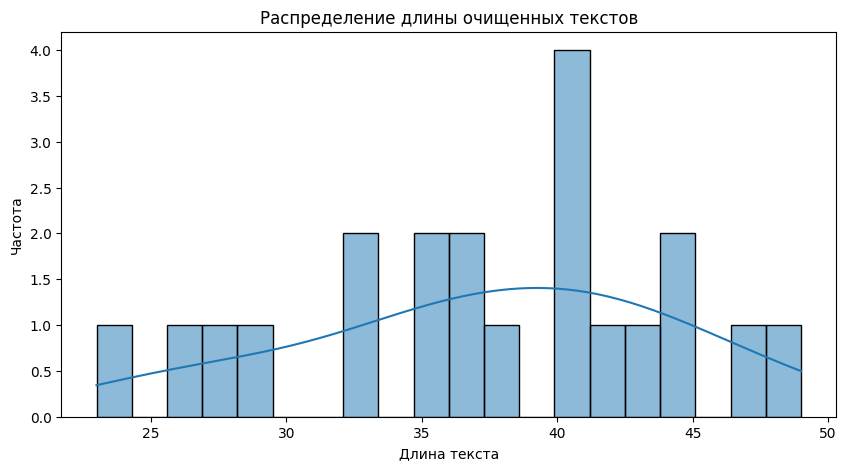

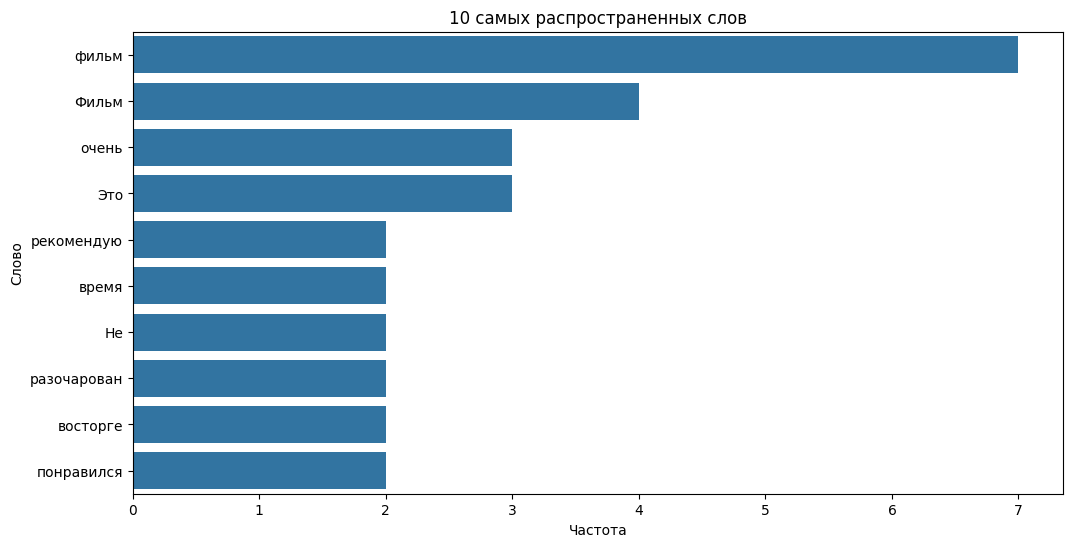

Примеры положительных отзывов:
               Лучший фильм года восторге
        Это шедевр Обязательно пересмотрю
Этот фильм замечательным очень интересным
 Мне понравилась музыка атмосферные сцены
    Сюжет закрученный очень захватывающий

Примеры отрицательных отзывов:
         Не тратьте время фильм ужасен
Зачем снимать такое Сильно разочарован
          Мне понравился фильм скучным
   Полный провал советую тратить время
   Это настоящая катастрофа рекомендую
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Отзыв: "Фильм был отличным, я был в восторге!" - Предсказанная тональность: Положительный
Отзыв: "Совершенно неинтересный, лучше не смотреть." - Предсказанная тональность: Положительный
Отзыв: "Это шедевр! Актеры сыграли великолепно." - Предсказанная тональность: Положительный
Отзыв: "Это настоящая катастрофа рекомендую." - Предсказанная тональность: Положительный


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from nltk.corpus import stopwords
import nltk

# Убедитесь, что стоп-слова загружены
nltk.download('stopwords')

class SentimentAnalysisLSTM:
    def __init__(self, data, embedding_dim=8, max_words=100):
        self.data = data
        self.embedding_dim = embedding_dim
        self.max_words = max_words
        self.model = None
        self.tokenizer = None
        self.max_length = None
        self.X_train_pad = None
        self.X_test_pad = None

    def preprocess_data(self):
        # Проверка на соответствие длины списков
        if len(self.data['text']) != len(self.data['label']):
            raise ValueError("Длина списков 'text' и 'label' не совпадает!")

        # Создание DataFrame и преобразование текста
        df = pd.DataFrame(self.data)
        df['text'] = df['text'].str.lower()  # Преобразование в нижний регистр

        # Разделение данных на обучающую и тестовую выборки
        X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.25, random_state=42)

        # Токенизация
        self.tokenizer = Tokenizer(num_words=self.max_words)
        self.tokenizer.fit_on_texts(X_train)

        # Преобразование текста в последовательности
        X_train_seq = self.tokenizer.texts_to_sequences(X_train)
        X_test_seq = self.tokenizer.texts_to_sequences(X_test)

        # Паддинг
        self.max_length = max(len(x) for x in X_train_seq)
        self.X_train_pad = pad_sequences(X_train_seq, maxlen=self.max_length, padding='post')
        self.X_test_pad = pad_sequences(X_test_seq, maxlen=self.max_length, padding='post')

        return y_train, y_test

    def clean_text(self, text):
        # Удаление лишних символов и преобразование в нижний регистр
        text = re.sub(r'[@#$%^&*()_+=\-.,!?]', '', text)  # Удаление спецсимволов
        text = re.sub(r'\s+', ' ', text)  # Удаление лишних пробелов
        text = text.strip()  # Удаление пробелов в начале и конце
        return text

    def perform_eda(self):
        # Создание DataFrame для анализа
        df = pd.DataFrame(self.data)

        # Применение предобработки текста
        df['cleaned_text'] = df['text'].apply(self.clean_text)

        # Удаление стоп-слов
        stop_words = set(stopwords.words('russian'))
        df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

        # 1. Распределение меток
        plt.figure(figsize=(8, 4))
        sns.countplot(x='label', data=df)
        plt.title('Распределение меток')
        plt.xlabel('Метка (0 - Отрицательный, 1 - Положительный)')
        plt.ylabel('Количество')
        plt.show()

        # 2. Статистика по длине текстов
        df['text_length'] = df['cleaned_text'].str.len()
        plt.figure(figsize=(10, 5))
        sns.histplot(df['text_length'], bins=20, kde=True)
        plt.title('Распределение длины очищенных текстов')
        plt.xlabel('Длина текста')
        plt.ylabel('Частота')
        plt.show()

        # 3. Частота слов
        all_words = ' '.join(df['cleaned_text'])
        word_counts = pd.Series(all_words.split()).value_counts()
        plt.figure(figsize=(12, 6))
        sns.barplot(x=word_counts.values[:10], y=word_counts.index[:10])
        plt.title('10 самых распространенных слов')
        plt.xlabel('Частота')
        plt.ylabel('Слово')
        plt.show()

        # 4. Примеры положительных и отрицательных отзывов
        positive_reviews = df[df['label'] == 1].sample(5, random_state=42)
        negative_reviews = df[df['label'] == 0].sample(5, random_state=42)

        print("Примеры положительных отзывов:")
        print(positive_reviews['cleaned_text'].to_string(index=False))
        print("\nПримеры отрицательных отзывов:")
        print(negative_reviews['cleaned_text'].to_string(index=False))

    def build_model(self):
        # Параметры модели
        vocab_size = len(self.tokenizer.word_index) + 1  # Количество уникальных слов

        # Создание модели LSTM
        self.model = Sequential()
        self.model.add(Embedding(vocab_size, self.embedding_dim, input_length=self.max_length))  # Эмбеддинговый слой
        self.model.add(LSTM(32))  # LSTM слой
        self.model.add(Dense(1, activation='sigmoid'))  # Выходной слой

        # Компиляция модели
        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    def train_model(self, y_train, y_test):
        # Установка обратного вызова для ранней остановки
        early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

        # Обучение модели
        history = self.model.fit(self.X_train_pad, y_train, epochs=10, batch_size=2,
                                 validation_data=(self.X_test_pad, y_test), callbacks=[early_stopping])

        return history

    def evaluate_model(self, y_test):
        # Оценка модели на тестовой выборке
        test_loss, test_accuracy = self.model.evaluate(self.X_test_pad, y_test)
        print(f"Тестовая точность: {test_accuracy:.4f}, Тестовые потери: {test_loss:.4f}")

    def plot_metrics(self, history):
        # График точности
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
        plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
        plt.title('Точность модели LSTM')
        plt.ylabel('Точность')
        plt.xlabel('Эпоха')
        plt.legend(loc='lower right')

        # График потерь
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Потери на обучающей выборке')
        plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
        plt.title('Потери модели LSTM')
        plt.ylabel('Потери')
        plt.xlabel('Эпоха')
        plt.legend(loc='upper right')

        plt.tight_layout()
        plt.show()

    def predict_sentiment(self, new_reviews):
        # Токенизация и паддинг новых данных
        new_reviews_seq = self.tokenizer.texts_to_sequences(new_reviews)
        new_reviews_pad = pad_sequences(new_reviews_seq, maxlen=self.max_length, padding='post')

        # Предсказание на новых данных
        predictions = self.model.predict(new_reviews_pad)
        predicted_labels = (predictions > 0.5).astype(int)

        # Вывод результатов
        results = []
        for review, prediction in zip(new_reviews, predicted_labels):
            sentiment = "Положительный" if prediction == 1 else "Отрицательный"
            results.append(f"Отзыв: \"{review}\" - Предсказанная тональность: {sentiment}")

        return results

# Пример использования класса
if __name__ == "__main__":
    data = {
        'text': [
            "Этот фильм был замечательным и очень интересным",  # 1
            "Мне не понравился этот фильм, он был скучным",      # 0
            "Отличная работа актеров и сценарий был великолепным", # 1
            "Не тратьте время на этот фильм, он ужасен",        # 0
            "Фильм мне очень понравился, я буду его смотреть снова", # 1
            "Это была настоящая катастрофа, не рекомендую",     # 0
            "Замечательная комедия, я смеялся весь фильм",       # 1
            "Фильм не оправдал моих ожиданий, разочарован",      # 0
            "Прекрасная работа режиссера, замечательные пейзажи", # 1
            "Сюжет закрученный и очень захватывающий",           # 1
            "Я был в восторге от актерской игры, просто потрясающе!", # 1
            "Не могу поверить, что кто-то может назвать этот фильм хорошим", # 0
            "Фильм оставил яркие впечатления, рекомендую всем!",  # 1
            "Зачем было снимать такое? Сильно разочарован!",      # 0
            "Мне понравилась музыка и атмосферные сцены",         # 1
            "Это было просто ужасно, никогда не пойду на такие фильмы", # 0
            "Это шедевр! Обязательно пересмотрю",                 # 1
            "Полный провал, не советую тратить время",            # 0
            "Хороший фильм для семейного просмотра",              # 1
            "Лучший фильм года, я в восторге!",                   # 1
            "Фильм не такой уж и плохой, есть свои плюсы"        # 1
        ],
        'label': [
            1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
            1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
            1
        ]
    }

    sentiment_model = SentimentAnalysisLSTM(data)
    y_train, y_test = sentiment_model.preprocess_data()
    sentiment_model.build_model()
    history = sentiment_model.train_model(y_train, y_test)
    sentiment_model.evaluate_model(y_test)
    sentiment_model.plot_metrics(history)

    # Выполнение EDA
    sentiment_model.perform_eda()

    # Шаг 1: Подготовка новых данных
    new_reviews = [
        "Фильм был отличным, я был в восторге!",
        "Совершенно неинтересный, лучше не смотреть.",
        "Это шедевр! Актеры сыграли великолепно.",
        "Это настоящая катастрофа рекомендую."
    ]

    # Шаг 3: Предсказание на новых данных
    predictions = sentiment_model.predict_sentiment(new_reviews)
    for result in predictions:
        print(result)

#GRU

Epoch 1/10


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.4394 - loss: 0.6901 - val_accuracy: 0.3333 - val_loss: 0.7061
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7414 - loss: 0.6721 - val_accuracy: 0.3333 - val_loss: 0.7219
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7544 - loss: 0.6512 - val_accuracy: 0.3333 - val_loss: 0.7472
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.3333 - loss: 0.7061
Тестовая точность: 0.3333, Тестовые потери: 0.7061


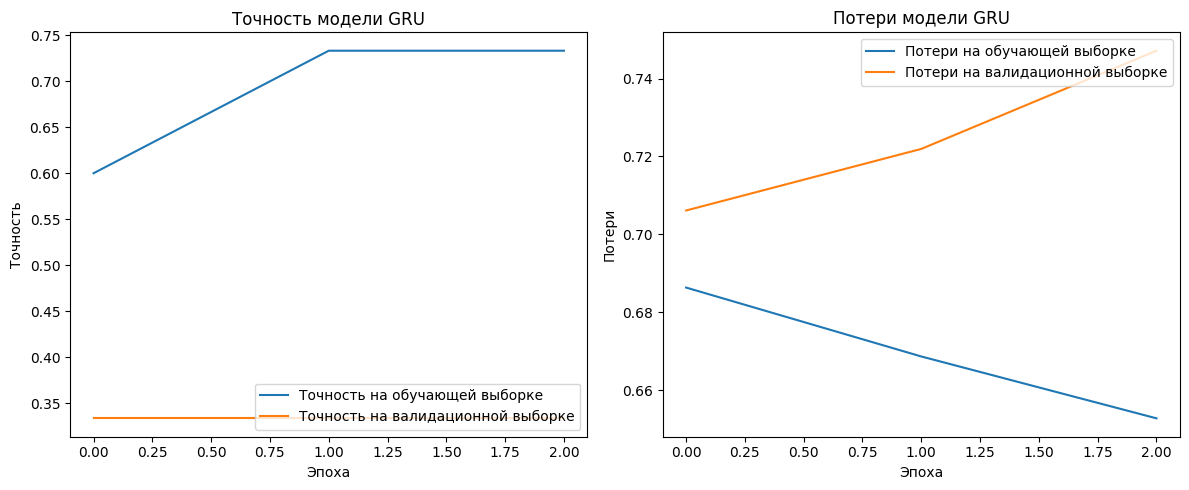

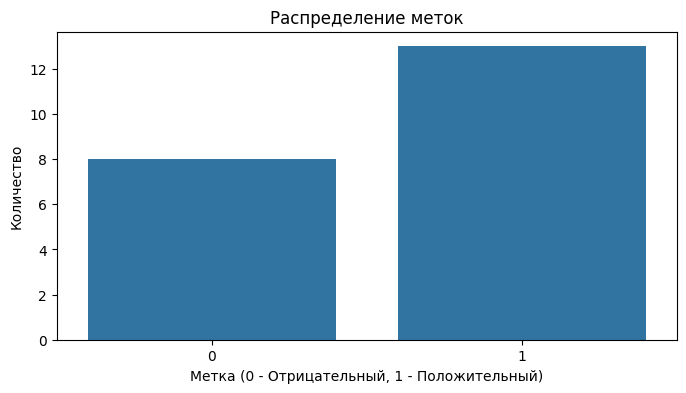

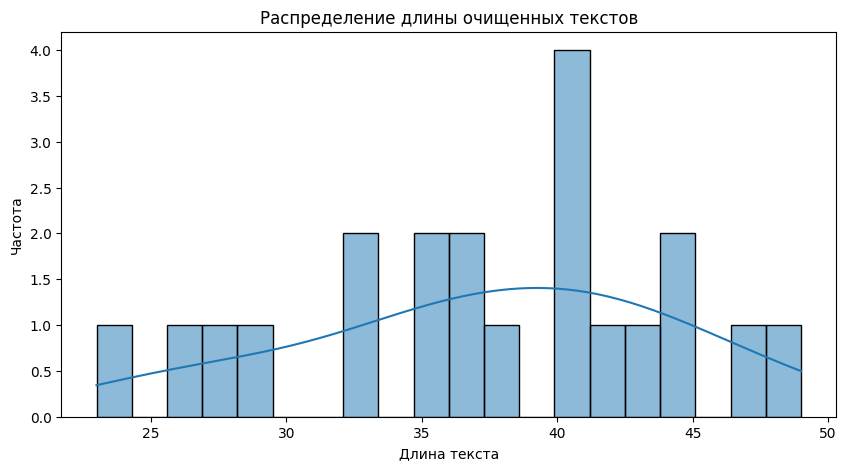

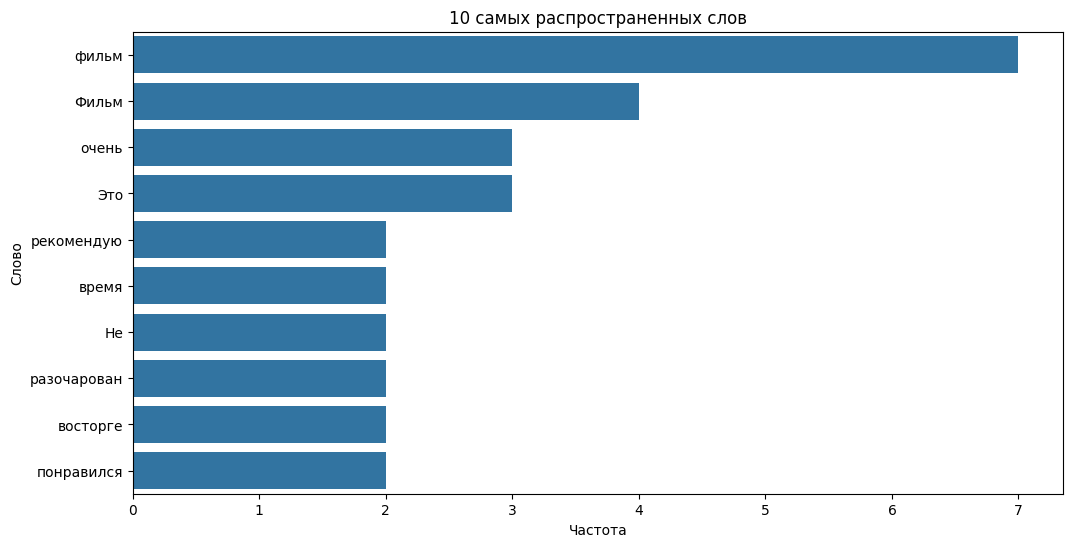

Примеры положительных отзывов:
               Лучший фильм года восторге
        Это шедевр Обязательно пересмотрю
Этот фильм замечательным очень интересным
 Мне понравилась музыка атмосферные сцены
    Сюжет закрученный очень захватывающий

Примеры отрицательных отзывов:
         Не тратьте время фильм ужасен
Зачем снимать такое Сильно разочарован
          Мне понравился фильм скучным
   Полный провал советую тратить время
   Это настоящая катастрофа рекомендую


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Отзыв: "Фильм был отличным, я был в восторге!" - Предсказанная тональность: Положительный
Отзыв: "Совершенно неинтересный, лучше не смотреть." - Предсказанная тональность: Положительный
Отзыв: "Это шедевр! Актеры сыграли великолепно." - Предсказанная тональность: Положительный
Отзыв: "Это настоящая катастрофа рекомендую." - Предсказанная тональность: Положительный


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from nltk.corpus import stopwords
import nltk

# Убедитесь, что стоп-слова загружены
nltk.download('stopwords')

class SentimentAnalysisGRU:
    def __init__(self, data, embedding_dim=8, max_words=100):
        self.data = data
        self.embedding_dim = embedding_dim
        self.max_words = max_words
        self.model = None
        self.tokenizer = None
        self.max_length = None
        self.X_train_pad = None
        self.X_test_pad = None

    def preprocess_data(self):
        # Проверка на соответствие длины списков
        if len(self.data['text']) != len(self.data['label']):
            raise ValueError("Длина списков 'text' и 'label' не совпадает!")

        # Создание DataFrame и преобразование текста
        df = pd.DataFrame(self.data)
        df['text'] = df['text'].str.lower()  # Преобразование в нижний регистр

        # Разделение данных на обучающую и тестовую выборки
        X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.25, random_state=42)

        # Токенизация
        self.tokenizer = Tokenizer(num_words=self.max_words)
        self.tokenizer.fit_on_texts(X_train)

        # Преобразование текста в последовательности
        X_train_seq = self.tokenizer.texts_to_sequences(X_train)
        X_test_seq = self.tokenizer.texts_to_sequences(X_test)

        # Паддинг
        self.max_length = max(len(x) for x in X_train_seq)
        self.X_train_pad = pad_sequences(X_train_seq, maxlen=self.max_length, padding='post')
        self.X_test_pad = pad_sequences(X_test_seq, maxlen=self.max_length, padding='post')

        return y_train, y_test

    def clean_text(self, text):
        # Удаление лишних символов и преобразование в нижний регистр
        text = re.sub(r'[@#$%^&*()_+=\-.,!?]', '', text)  # Удаление спецсимволов
        text = re.sub(r'\s+', ' ', text)  # Удаление лишних пробелов
        text = text.strip()  # Удаление пробелов в начале и конце
        return text

    def perform_eda(self):
        # Создание DataFrame для анализа
        df = pd.DataFrame(self.data)

        # Применение предобработки текста
        df['cleaned_text'] = df['text'].apply(self.clean_text)

        # Удаление стоп-слов
        stop_words = set(stopwords.words('russian'))
        df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

        # 1. Распределение меток
        plt.figure(figsize=(8, 4))
        sns.countplot(x='label', data=df)
        plt.title('Распределение меток')
        plt.xlabel('Метка (0 - Отрицательный, 1 - Положительный)')
        plt.ylabel('Количество')
        plt.show()

        # 2. Статистика по длине текстов
        df['text_length'] = df['cleaned_text'].str.len()
        plt.figure(figsize=(10, 5))
        sns.histplot(df['text_length'], bins=20, kde=True)
        plt.title('Распределение длины очищенных текстов')
        plt.xlabel('Длина текста')
        plt.ylabel('Частота')
        plt.show()

        # 3. Частота слов
        all_words = ' '.join(df['cleaned_text'])
        word_counts = pd.Series(all_words.split()).value_counts()
        plt.figure(figsize=(12, 6))
        sns.barplot(x=word_counts.values[:10], y=word_counts.index[:10])
        plt.title('10 самых распространенных слов')
        plt.xlabel('Частота')
        plt.ylabel('Слово')
        plt.show()

        # 4. Примеры положительных и отрицательных отзывов
        positive_reviews = df[df['label'] == 1].sample(5, random_state=42)
        negative_reviews = df[df['label'] == 0].sample(5, random_state=42)

        print("Примеры положительных отзывов:")
        print(positive_reviews['cleaned_text'].to_string(index=False))
        print("\nПримеры отрицательных отзывов:")
        print(negative_reviews['cleaned_text'].to_string(index=False))

    def build_model(self):
        # Параметры модели
        vocab_size = len(self.tokenizer.word_index) + 1  # Количество уникальных слов

        # Создание модели GRU
        self.model = Sequential()
        self.model.add(Embedding(vocab_size, self.embedding_dim, input_length=self.max_length))  # Эмбеддинговый слой
        self.model.add(GRU(32))  # GRU слой
        self.model.add(Dense(1, activation='sigmoid'))  # Выходной слой

        # Компиляция модели
        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    def train_model(self, y_train, y_test):
        # Установка обратного вызова для ранней остановки
        early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

        # Обучение модели
        history = self.model.fit(self.X_train_pad, y_train, epochs=10, batch_size=2,
                                 validation_data=(self.X_test_pad, y_test), callbacks=[early_stopping])

        return history

    def evaluate_model(self, y_test):
        # Оценка модели на тестовой выборке
        test_loss, test_accuracy = self.model.evaluate(self.X_test_pad, y_test)
        print(f"Тестовая точность: {test_accuracy:.4f}, Тестовые потери: {test_loss:.4f}")

    def plot_metrics(self, history):
        # График точности
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
        plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
        plt.title('Точность модели GRU')
        plt.ylabel('Точность')
        plt.xlabel('Эпоха')
        plt.legend(loc='lower right')

        # График потерь
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Потери на обучающей выборке')
        plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
        plt.title('Потери модели GRU')
        plt.ylabel('Потери')
        plt.xlabel('Эпоха')
        plt.legend(loc='upper right')

        plt.tight_layout()
        plt.show()

    def predict_sentiment(self, new_reviews):
        # Токенизация и паддинг новых данных
        new_reviews_seq = self.tokenizer.texts_to_sequences(new_reviews)
        new_reviews_pad = pad_sequences(new_reviews_seq, maxlen=self.max_length, padding='post')

        # Предсказание на новых данных
        predictions = self.model.predict(new_reviews_pad)
        predicted_labels = (predictions > 0.5).astype(int)

        # Вывод результатов
        results = []
        for review, prediction in zip(new_reviews, predicted_labels):
            sentiment = "Положительный" if prediction == 1 else "Отрицательный"
            results.append(f"Отзыв: \"{review}\" - Предсказанная тональность: {sentiment}")

        return results

# Пример использования класса
if __name__ == "__main__":
    data = {
        'text': [
            "Этот фильм был замечательным и очень интересным",  # 1
            "Мне не понравился этот фильм, он был скучным",      # 0
            "Отличная работа актеров и сценарий был великолепным", # 1
            "Не тратьте время на этот фильм, он ужасен",        # 0
            "Фильм мне очень понравился, я буду его смотреть снова", # 1
            "Это была настоящая катастрофа, не рекомендую",     # 0
            "Замечательная комедия, я смеялся весь фильм",       # 1
            "Фильм не оправдал моих ожиданий, разочарован",      # 0
            "Прекрасная работа режиссера, замечательные пейзажи", # 1
            "Сюжет закрученный и очень захватывающий",           # 1
            "Я был в восторге от актерской игры, просто потрясающе!", # 1
            "Не могу поверить, что кто-то может назвать этот фильм хорошим", # 0
            "Фильм оставил яркие впечатления, рекомендую всем!",  # 1
            "Зачем было снимать такое? Сильно разочарован!",      # 0
            "Мне понравилась музыка и атмосферные сцены",         # 1
            "Это было просто ужасно, никогда не пойду на такие фильмы", # 0
            "Это шедевр! Обязательно пересмотрю",                 # 1
            "Полный провал, не советую тратить время",            # 0
            "Хороший фильм для семейного просмотра",              # 1
            "Лучший фильм года, я в восторге!",                   # 1
            "Фильм не такой уж и плохой, есть свои плюсы"        # 1
        ],
        'label': [
            1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
            1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
            1
        ]
    }

    sentiment_model = SentimentAnalysisGRU(data)
    y_train, y_test = sentiment_model.preprocess_data()
    sentiment_model.build_model()
    history = sentiment_model.train_model(y_train, y_test)
    sentiment_model.evaluate_model(y_test)
    sentiment_model.plot_metrics(history)

    # Выполнение EDA
    sentiment_model.perform_eda()

    # Шаг 1: Подготовка новых данных
    new_reviews = [
        "Фильм был отличным, я был в восторге!",
        "Совершенно неинтересный, лучше не смотреть.",
        "Это шедевр! Актеры сыграли великолепно.",
        "Это настоящая катастрофа рекомендую."
    ]

    # Шаг 3: Предсказание на новых данных
    predictions = sentiment_model.predict_sentiment(new_reviews)
    for result in predictions:
        print(result)

#BiRNN

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.7308 - loss: 0.6880 - val_accuracy: 0.3333 - val_loss: 0.7115
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7507 - loss: 0.6659 - val_accuracy: 0.3333 - val_loss: 0.7276
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8021 - loss: 0.6366 - val_accuracy: 0.3333 - val_loss: 0.7578
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step - accuracy: 0.3333 - loss: 0.7115
Тестовая точность: 0.3333, Тестовые потери: 0.7115


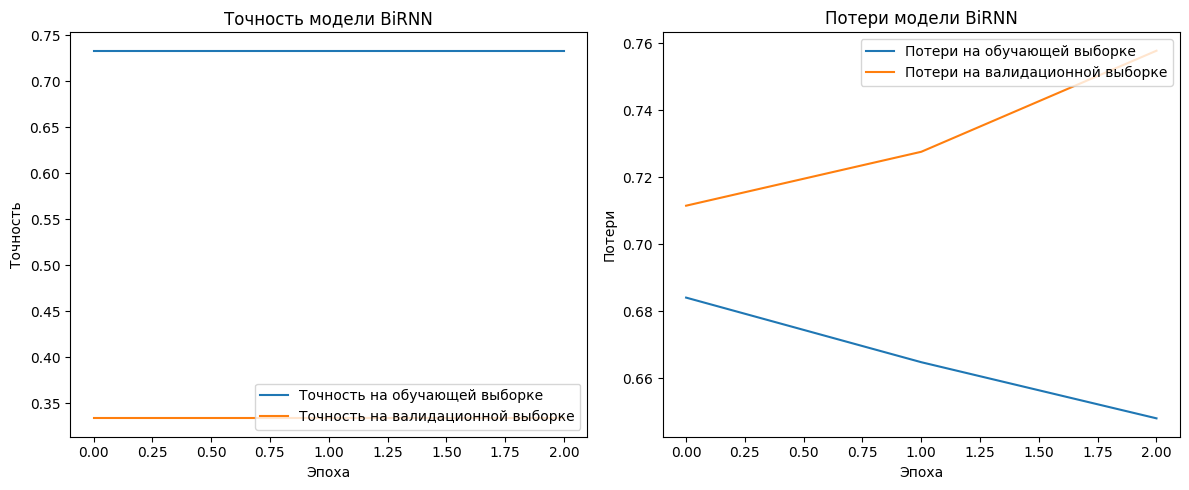

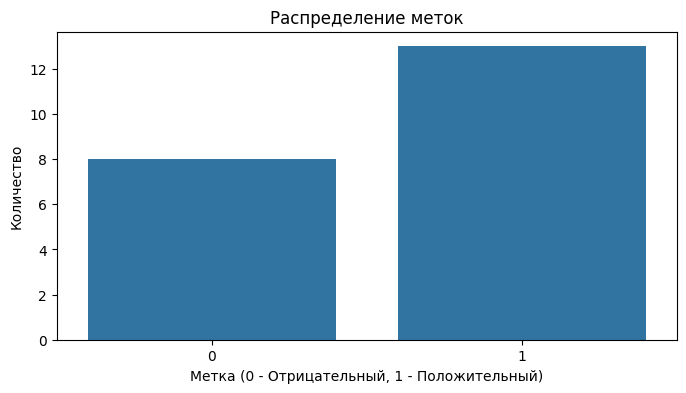

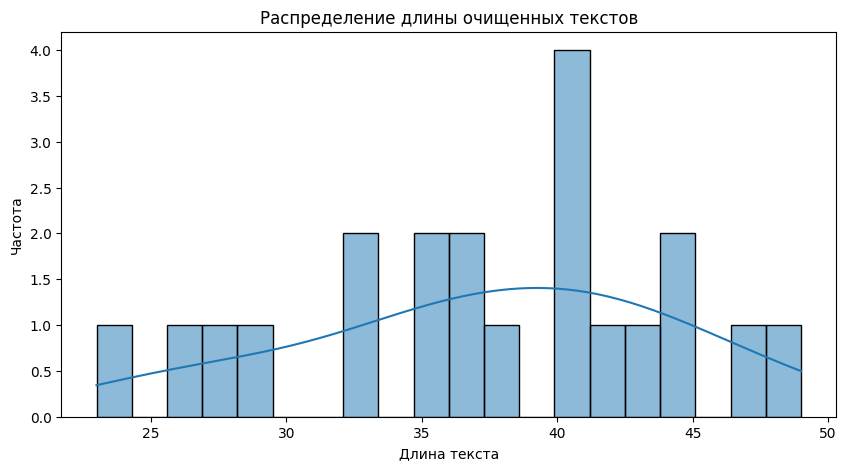

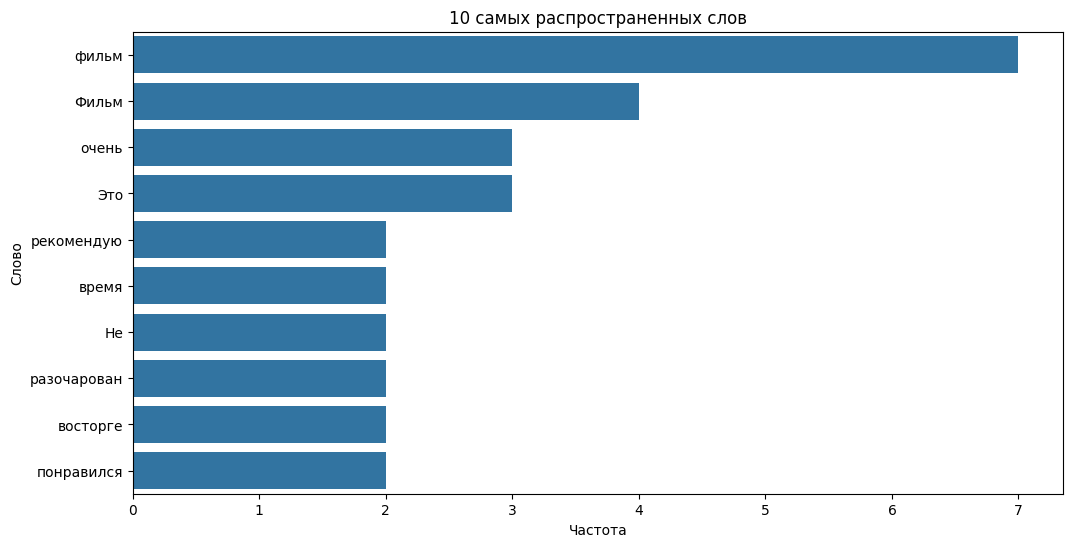

Примеры положительных отзывов:
               Лучший фильм года восторге
        Это шедевр Обязательно пересмотрю
Этот фильм замечательным очень интересным
 Мне понравилась музыка атмосферные сцены
    Сюжет закрученный очень захватывающий

Примеры отрицательных отзывов:
         Не тратьте время фильм ужасен
Зачем снимать такое Сильно разочарован
          Мне понравился фильм скучным
   Полный провал советую тратить время
   Это настоящая катастрофа рекомендую


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
Отзыв: "Фильм был отличным, я был в восторге!" - Предсказанная тональность: Положительный
Отзыв: "Совершенно неинтересный, лучше не смотреть." - Предсказанная тональность: Положительный
Отзыв: "Это шедевр! Актеры сыграли великолепно." - Предсказанная тональность: Положительный
Отзыв: "Это настоящая катастрофа рекомендую." - Предсказанная тональность: Положительный


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from nltk.corpus import stopwords
import nltk

# Убедитесь, что стоп-слова загружены
nltk.download('stopwords')

class SentimentAnalysisBiRNN:
    def __init__(self, data, embedding_dim=8, max_words=100):
        self.data = data
        self.embedding_dim = embedding_dim
        self.max_words = max_words
        self.model = None
        self.tokenizer = None
        self.max_length = None
        self.X_train_pad = None
        self.X_test_pad = None

    def preprocess_data(self):
        # Проверка на соответствие длины списков
        if len(self.data['text']) != len(self.data['label']):
            raise ValueError("Длина списков 'text' и 'label' не совпадает!")

        # Создание DataFrame и преобразование текста
        df = pd.DataFrame(self.data)
        df['text'] = df['text'].str.lower()  # Преобразование в нижний регистр

        # Разделение данных на обучающую и тестовую выборки
        X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.25, random_state=42)

        # Токенизация
        self.tokenizer = Tokenizer(num_words=self.max_words)
        self.tokenizer.fit_on_texts(X_train)

        # Преобразование текста в последовательности
        X_train_seq = self.tokenizer.texts_to_sequences(X_train)
        X_test_seq = self.tokenizer.texts_to_sequences(X_test)

        # Паддинг
        self.max_length = max(len(x) for x in X_train_seq)
        self.X_train_pad = pad_sequences(X_train_seq, maxlen=self.max_length, padding='post')
        self.X_test_pad = pad_sequences(X_test_seq, maxlen=self.max_length, padding='post')

        return y_train, y_test

    def clean_text(self, text):
        # Удаление лишних символов и преобразование в нижний регистр
        text = re.sub(r'[@#$%^&*()_+=\-.,!?]', '', text)  # Удаление спецсимволов
        text = re.sub(r'\s+', ' ', text)  # Удаление лишних пробелов
        text = text.strip()  # Удаление пробелов в начале и конце
        return text

    def perform_eda(self):
        # Создание DataFrame для анализа
        df = pd.DataFrame(self.data)

        # Применение предобработки текста
        df['cleaned_text'] = df['text'].apply(self.clean_text)

        # Удаление стоп-слов
        stop_words = set(stopwords.words('russian'))
        df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

        # 1. Распределение меток
        plt.figure(figsize=(8, 4))
        sns.countplot(x='label', data=df)
        plt.title('Распределение меток')
        plt.xlabel('Метка (0 - Отрицательный, 1 - Положительный)')
        plt.ylabel('Количество')
        plt.show()

        # 2. Статистика по длине текстов
        df['text_length'] = df['cleaned_text'].str.len()
        plt.figure(figsize=(10, 5))
        sns.histplot(df['text_length'], bins=20, kde=True)
        plt.title('Распределение длины очищенных текстов')
        plt.xlabel('Длина текста')
        plt.ylabel('Частота')
        plt.show()

        # 3. Частота слов
        all_words = ' '.join(df['cleaned_text'])
        word_counts = pd.Series(all_words.split()).value_counts()
        plt.figure(figsize=(12, 6))
        sns.barplot(x=word_counts.values[:10], y=word_counts.index[:10])
        plt.title('10 самых распространенных слов')
        plt.xlabel('Частота')
        plt.ylabel('Слово')
        plt.show()

        # 4. Примеры положительных и отрицательных отзывов
        positive_reviews = df[df['label'] == 1].sample(5, random_state=42)
        negative_reviews = df[df['label'] == 0].sample(5, random_state=42)

        print("Примеры положительных отзывов:")
        print(positive_reviews['cleaned_text'].to_string(index=False))
        print("\nПримеры отрицательных отзывов:")
        print(negative_reviews['cleaned_text'].to_string(index=False))

    def build_model(self):
        # Параметры модели
        vocab_size = len(self.tokenizer.word_index) + 1  # Количество уникальных слов

        # Создание модели BiRNN
        self.model = Sequential()
        self.model.add(Embedding(vocab_size, self.embedding_dim, input_length=self.max_length))  # Эмбеддинговый слой
        self.model.add(Bidirectional(GRU(32)))  # Bidirectional GRU слой
        self.model.add(Dense(1, activation='sigmoid'))  # Выходной слой

        # Компиляция модели
        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    def train_model(self, y_train, y_test):
        # Установка обратного вызова для ранней остановки
        early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

        # Обучение модели
        history = self.model.fit(self.X_train_pad, y_train, epochs=10, batch_size=2,
                                 validation_data=(self.X_test_pad, y_test), callbacks=[early_stopping])

        return history

    def evaluate_model(self, y_test):
        # Оценка модели на тестовой выборке
        test_loss, test_accuracy = self.model.evaluate(self.X_test_pad, y_test)
        print(f"Тестовая точность: {test_accuracy:.4f}, Тестовые потери: {test_loss:.4f}")

    def plot_metrics(self, history):
        # График точности
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
        plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
        plt.title('Точность модели BiRNN')
        plt.ylabel('Точность')
        plt.xlabel('Эпоха')
        plt.legend(loc='lower right')

        # График потерь
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Потери на обучающей выборке')
        plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
        plt.title('Потери модели BiRNN')
        plt.ylabel('Потери')
        plt.xlabel('Эпоха')
        plt.legend(loc='upper right')

        plt.tight_layout()
        plt.show()

    def predict_sentiment(self, new_reviews):
        # Токенизация и паддинг новых данных
        new_reviews_seq = self.tokenizer.texts_to_sequences(new_reviews)
        new_reviews_pad = pad_sequences(new_reviews_seq, maxlen=self.max_length, padding='post')

        # Предсказание на новых данных
        predictions = self.model.predict(new_reviews_pad)
        predicted_labels = (predictions > 0.5).astype(int)

        # Вывод результатов
        results = []
        for review, prediction in zip(new_reviews, predicted_labels):
            sentiment = "Положительный" if prediction == 1 else "Отрицательный"
            results.append(f"Отзыв: \"{review}\" - Предсказанная тональность: {sentiment}")

        return results

# Пример использования класса
if __name__ == "__main__":
    data = {
        'text': [
            "Этот фильм был замечательным и очень интересным",  # 1
            "Мне не понравился этот фильм, он был скучным",      # 0
            "Отличная работа актеров и сценарий был великолепным", # 1
            "Не тратьте время на этот фильм, он ужасен",        # 0
            "Фильм мне очень понравился, я буду его смотреть снова", # 1
            "Это была настоящая катастрофа, не рекомендую",     # 0
            "Замечательная комедия, я смеялся весь фильм",       # 1
            "Фильм не оправдал моих ожиданий, разочарован",      # 0
            "Прекрасная работа режиссера, замечательные пейзажи", # 1
            "Сюжет закрученный и очень захватывающий",           # 1
            "Я был в восторге от актерской игры, просто потрясающе!", # 1
            "Не могу поверить, что кто-то может назвать этот фильм хорошим", # 0
            "Фильм оставил яркие впечатления, рекомендую всем!",  # 1
            "Зачем было снимать такое? Сильно разочарован!",      # 0
            "Мне понравилась музыка и атмосферные сцены",         # 1
            "Это было просто ужасно, никогда не пойду на такие фильмы", # 0
            "Это шедевр! Обязательно пересмотрю",                 # 1
            "Полный провал, не советую тратить время",            # 0
            "Хороший фильм для семейного просмотра",              # 1
            "Лучший фильм года, я в восторге!",                   # 1
            "Фильм не такой уж и плохой, есть свои плюсы"        # 1
        ],
        'label': [
            1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
            1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
            1
        ]
    }

    sentiment_model = SentimentAnalysisBiRNN(data)
    y_train, y_test = sentiment_model.preprocess_data()
    sentiment_model.build_model()
    history = sentiment_model.train_model(y_train, y_test)
    sentiment_model.evaluate_model(y_test)
    sentiment_model.plot_metrics(history)

    # Выполнение EDA
    sentiment_model.perform_eda()

    # Шаг 1: Подготовка новых данных
    new_reviews = [
        "Фильм был отличным, я был в восторге!",
        "Совершенно неинтересный, лучше не смотреть.",
        "Это шедевр! Актеры сыграли великолепно.",
        "Это настоящая катастрофа рекомендую."
    ]

    # Шаг 3: Предсказание на новых данных
    predictions = sentiment_model.predict_sentiment(new_reviews)
    for result in predictions:
        print(result)

## Гибрыдный модель

Epoch 1/10


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.7604 - loss: 0.6876 - val_accuracy: 0.3333 - val_loss: 0.7152
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6488 - loss: 0.6712 - val_accuracy: 0.3333 - val_loss: 0.7361
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8062 - loss: 0.6267 - val_accuracy: 0.3333 - val_loss: 0.7992
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.3333 - loss: 0.7152
Тестовая точность: 0.3333, Тестовые потери: 0.7152


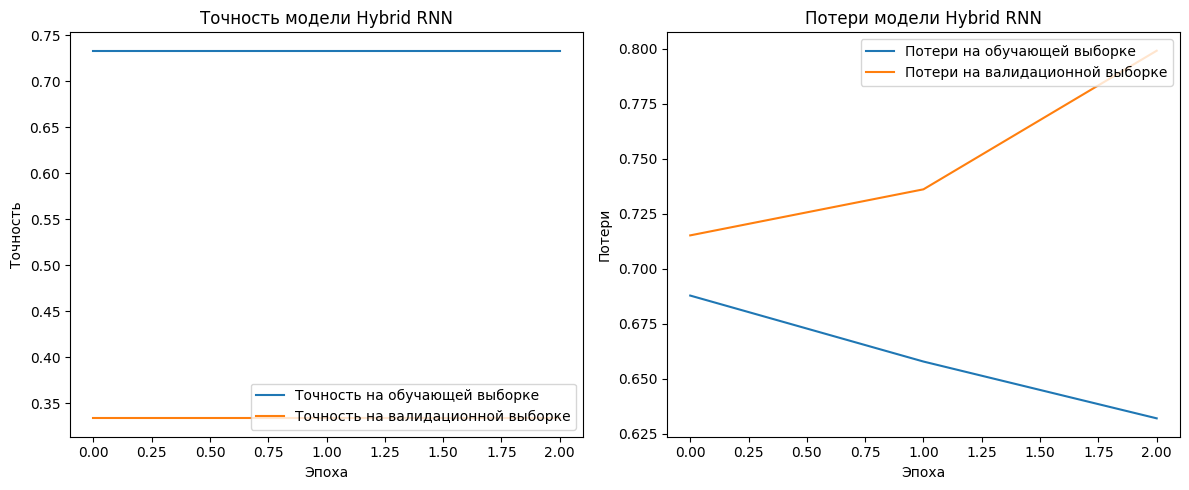

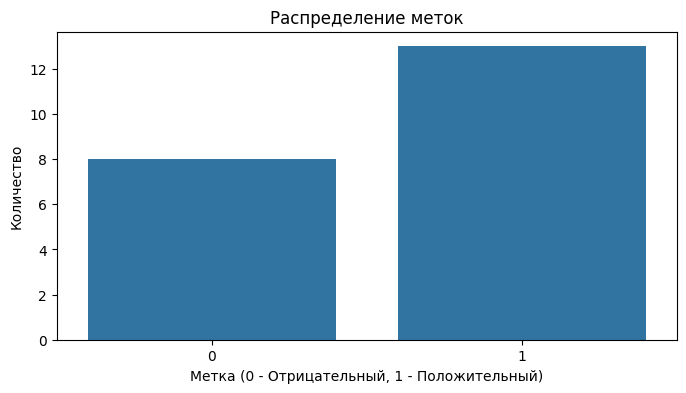

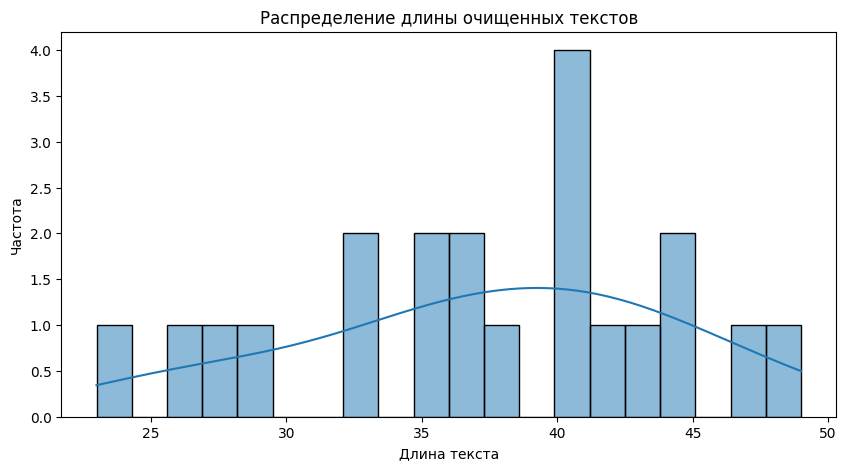

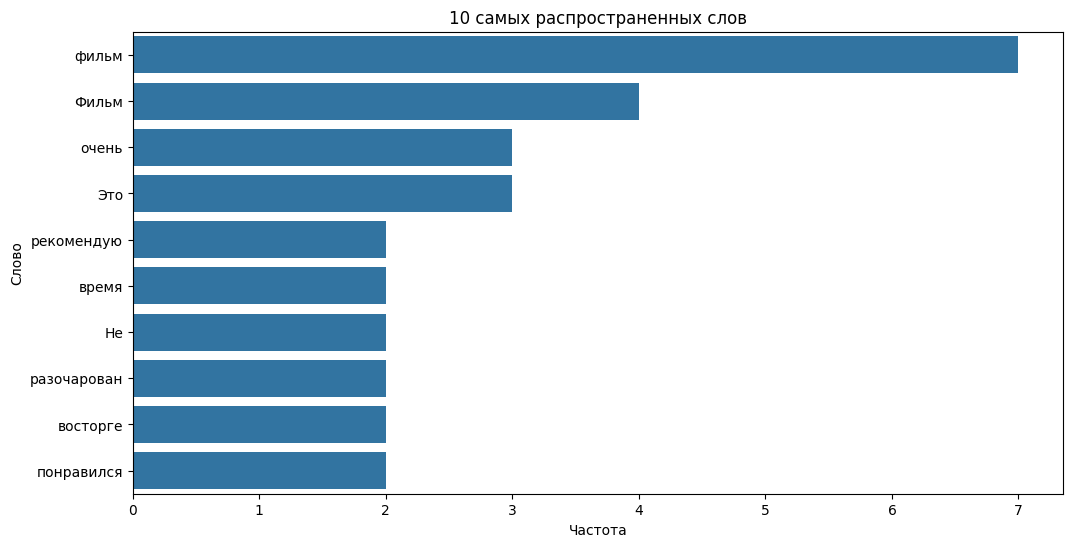

Примеры положительных отзывов:
               Лучший фильм года восторге
        Это шедевр Обязательно пересмотрю
Этот фильм замечательным очень интересным
 Мне понравилась музыка атмосферные сцены
    Сюжет закрученный очень захватывающий

Примеры отрицательных отзывов:
         Не тратьте время фильм ужасен
Зачем снимать такое Сильно разочарован
          Мне понравился фильм скучным
   Полный провал советую тратить время
   Это настоящая катастрофа рекомендую
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
Отзыв: "Фильм был отличным, я был в восторге!" - Предсказанная тональность: Положительный
Отзыв: "Совершенно неинтересный, лучше не смотреть." - Предсказанная тональность: Положительный
Отзыв: "Это шедевр! Актеры сыграли великолепно." - Предсказанная тональность: Положительный
Отзыв: "Это настоящая катастрофа рекомендую." - Предсказанная тональность: Положительный


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from nltk.corpus import stopwords
import nltk

# Убедитесь, что стоп-слова загружены
nltk.download('stopwords')

class SentimentAnalysisHybridRNN:
    def __init__(self, data, embedding_dim=8, max_words=100):
        self.data = data
        self.embedding_dim = embedding_dim
        self.max_words = max_words
        self.model = None
        self.tokenizer = None
        self.max_length = None
        self.X_train_pad = None
        self.X_test_pad = None

    def preprocess_data(self):
        # Проверка на соответствие длины списков
        if len(self.data['text']) != len(self.data['label']):
            raise ValueError("Длина списков 'text' и 'label' не совпадает!")

        # Создание DataFrame и преобразование текста
        df = pd.DataFrame(self.data)
        df['text'] = df['text'].str.lower()  # Преобразование в нижний регистр

        # Разделение данных на обучающую и тестовую выборки
        X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.25, random_state=42)

        # Токенизация
        self.tokenizer = Tokenizer(num_words=self.max_words)
        self.tokenizer.fit_on_texts(X_train)

        # Преобразование текста в последовательности
        X_train_seq = self.tokenizer.texts_to_sequences(X_train)
        X_test_seq = self.tokenizer.texts_to_sequences(X_test)

        # Паддинг
        self.max_length = max(len(x) for x in X_train_seq)
        self.X_train_pad = pad_sequences(X_train_seq, maxlen=self.max_length, padding='post')
        self.X_test_pad = pad_sequences(X_test_seq, maxlen=self.max_length, padding='post')

        return y_train, y_test

    def clean_text(self, text):
        # Удаление лишних символов и преобразование в нижний регистр
        text = re.sub(r'[@#$%^&*()_+=\-.,!?]', '', text)  # Удаление спецсимволов
        text = re.sub(r'\s+', ' ', text)  # Удаление лишних пробелов
        text = text.strip()  # Удаление пробелов в начале и конце
        return text

    def perform_eda(self):
        # Создание DataFrame для анализа
        df = pd.DataFrame(self.data)

        # Применение предобработки текста
        df['cleaned_text'] = df['text'].apply(self.clean_text)

        # Удаление стоп-слов
        stop_words = set(stopwords.words('russian'))
        df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

        # 1. Распределение меток
        plt.figure(figsize=(8, 4))
        sns.countplot(x='label', data=df)
        plt.title('Распределение меток')
        plt.xlabel('Метка (0 - Отрицательный, 1 - Положительный)')
        plt.ylabel('Количество')
        plt.show()

        # 2. Статистика по длине текстов
        df['text_length'] = df['cleaned_text'].str.len()
        plt.figure(figsize=(10, 5))
        sns.histplot(df['text_length'], bins=20, kde=True)
        plt.title('Распределение длины очищенных текстов')
        plt.xlabel('Длина текста')
        plt.ylabel('Частота')
        plt.show()

        # 3. Частота слов
        all_words = ' '.join(df['cleaned_text'])
        word_counts = pd.Series(all_words.split()).value_counts()
        plt.figure(figsize=(12, 6))
        sns.barplot(x=word_counts.values[:10], y=word_counts.index[:10])
        plt.title('10 самых распространенных слов')
        plt.xlabel('Частота')
        plt.ylabel('Слово')
        plt.show()

        # 4. Примеры положительных и отрицательных отзывов
        positive_reviews = df[df['label'] == 1].sample(5, random_state=42)
        negative_reviews = df[df['label'] == 0].sample(5, random_state=42)

        print("Примеры положительных отзывов:")
        print(positive_reviews['cleaned_text'].to_string(index=False))
        print("\nПримеры отрицательных отзывов:")
        print(negative_reviews['cleaned_text'].to_string(index=False))

    def build_model(self):
        # Параметры модели
        vocab_size = len(self.tokenizer.word_index) + 1  # Количество уникальных слов

        # Создание модели Hybrid RNN
        self.model = Sequential()
        self.model.add(Embedding(vocab_size, self.embedding_dim, input_length=self.max_length))  # Эмбеддинговый слой
        self.model.add(GRU(32, return_sequences=True))  # Первый GRU слой
        self.model.add(Dropout(0.2))  # Слой Dropout для регуляризации
        self.model.add(LSTM(32))  # LSTM слой
        self.model.add(Dense(1, activation='sigmoid'))  # Выходной слой

        # Компиляция модели
        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    def train_model(self, y_train, y_test):
        # Установка обратного вызова для ранней остановки
        early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

        # Обучение модели
        history = self.model.fit(self.X_train_pad, y_train, epochs=10, batch_size=2,
                                 validation_data=(self.X_test_pad, y_test), callbacks=[early_stopping])

        return history

    def evaluate_model(self, y_test):
        # Оценка модели на тестовой выборке
        test_loss, test_accuracy = self.model.evaluate(self.X_test_pad, y_test)
        print(f"Тестовая точность: {test_accuracy:.4f}, Тестовые потери: {test_loss:.4f}")

    def plot_metrics(self, history):
        # График точности
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
        plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
        plt.title('Точность модели Hybrid RNN')
        plt.ylabel('Точность')
        plt.xlabel('Эпоха')
        plt.legend(loc='lower right')

        # График потерь
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Потери на обучающей выборке')
        plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
        plt.title('Потери модели Hybrid RNN')
        plt.ylabel('Потери')
        plt.xlabel('Эпоха')
        plt.legend(loc='upper right')

        plt.tight_layout()
        plt.show()

    def predict_sentiment(self, new_reviews):
        # Токенизация и паддинг новых данных
        new_reviews_seq = self.tokenizer.texts_to_sequences(new_reviews)
        new_reviews_pad = pad_sequences(new_reviews_seq, maxlen=self.max_length, padding='post')

        # Предсказание на новых данных
        predictions = self.model.predict(new_reviews_pad)
        predicted_labels = (predictions > 0.5).astype(int)

        # Вывод результатов
        results = []
        for review, prediction in zip(new_reviews, predicted_labels):
            sentiment = "Положительный" if prediction == 1 else "Отрицательный"
            results.append(f"Отзыв: \"{review}\" - Предсказанная тональность: {sentiment}")

        return results

# Пример использования класса
if __name__ == "__main__":
    data = {
        'text': [
            "Этот фильм был замечательным и очень интересным",  # 1
            "Мне не понравился этот фильм, он был скучным",      # 0
            "Отличная работа актеров и сценарий был великолепным", # 1
            "Не тратьте время на этот фильм, он ужасен",        # 0
            "Фильм мне очень понравился, я буду его смотреть снова", # 1
            "Это была настоящая катастрофа, не рекомендую",     # 0
            "Замечательная комедия, я смеялся весь фильм",       # 1
            "Фильм не оправдал моих ожиданий, разочарован",      # 0
            "Прекрасная работа режиссера, замечательные пейзажи", # 1
            "Сюжет закрученный и очень захватывающий",           # 1
            "Я был в восторге от актерской игры, просто потрясающе!", # 1
            "Не могу поверить, что кто-то может назвать этот фильм хорошим", # 0
            "Фильм оставил яркие впечатления, рекомендую всем!",  # 1
            "Зачем было снимать такое? Сильно разочарован!",      # 0
            "Мне понравилась музыка и атмосферные сцены",         # 1
            "Это было просто ужасно, никогда не пойду на такие фильмы", # 0
            "Это шедевр! Обязательно пересмотрю",                 # 1
            "Полный провал, не советую тратить время",            # 0
            "Хороший фильм для семейного просмотра",              # 1
            "Лучший фильм года, я в восторге!",                   # 1
            "Фильм не такой уж и плохой, есть свои плюсы"        # 1
        ],
        'label': [
            1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
            1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
            1
        ]
    }

    sentiment_model = SentimentAnalysisHybridRNN(data)
    y_train, y_test = sentiment_model.preprocess_data()
    sentiment_model.build_model()
    history = sentiment_model.train_model(y_train, y_test)
    sentiment_model.evaluate_model(y_test)
    sentiment_model.plot_metrics(history)

    # Выполнение EDA
    sentiment_model.perform_eda()

    # Шаг 1: Подготовка новых данных
    new_reviews = [
        "Фильм был отличным, я был в восторге!",
        "Совершенно неинтересный, лучше не смотреть.",
        "Это шедевр! Актеры сыграли великолепно.",
        "Это настоящая катастрофа рекомендую."
    ]

    # Шаг 3: Предсказание на новых данных
    predictions = sentiment_model.predict_sentiment(new_reviews)
    for result in predictions:
        print(result)

Давайте подробнее рассмотрим несколько задач в области обработки естественного языка (NLP), таких как анализ тональности, анализ настроения, кластеризация текста и классификация текста. Для каждой задачи я предложу разные подходы к преобразованию текста в векторы, а также опишу соответствующие алгоритмы и примеры реализации.

### 1. Анализ Тональности

**Задача**: Определить, является ли текст положительным, отрицательным или нейтральным.





Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 347ms/step - accuracy: 0.5104 - loss: 0.7218 - val_accuracy: 0.7500 - val_loss: 0.6575
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5000 - loss: 0.7358 - val_accuracy: 1.0000 - val_loss: 0.6706
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4271 - loss: 0.7136 - val_accuracy: 0.7500 - val_loss: 0.6789
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6042 - loss: 0.6281 - val_accuracy: 0.5000 - val_loss: 0.6803
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.3646 - loss: 0.7515 - val_accuracy: 0.5000 - val_loss: 0.6804
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.6354 - loss: 0.6353 - val_accuracy: 0.5000 - val_loss: 0.6825
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.2188 - loss: 0.7598 - val_accuracy: 0.5000 - val_loss: 0.6861
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.6771 - loss: 0.6609 - val_accuracy: 0.2500 - val_loss: 0.69

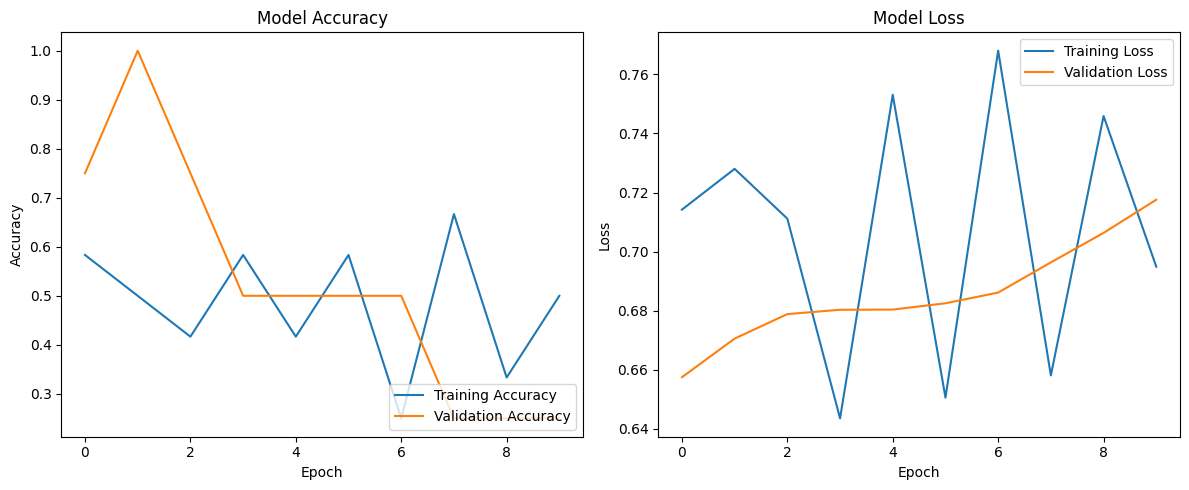

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
Review: 'I enjoyed this film very much' -> Sentiment: Positive
Review: 'It was a complete waste of my time' -> Sentiment: Positive
Review: 'An amazing story with great characters' -> Sentiment: Positive
Review: 'I wouldn't recommend this to anyone' -> Sentiment: Positive


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Пример текстовых данных и метки классов
texts = [
    "I love this movie",
    "This is the worst movie I have ever seen",
    "Absolutely fantastic!",
    "Not worth the time",
    "It was okay, nothing special",
    "I would watch this again",
    "Terrible plot and bad acting",
    "Great performances by the cast",
    "Not my cup of tea",
    "A masterpiece of cinema",
    "The direction was poor",
    "An enjoyable experience",
    "Boring and predictable",
    "Highly recommend this film",
    "Waste of time",
    "A thrilling adventure",
    "I hated every minute",
    "A real gem",
    "Disappointing ending",
    "One of the best films I've seen"
]
labels = [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Токенизация текстов и преобразование в последовательности
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Ограничение длины последовательностей
max_len = 20
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Создание модели RNN
model = Sequential([
    Embedding(input_dim=5000, output_dim=32, input_length=max_len),
    SimpleRNN(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели и сохранение истории обучения
history = model.fit(X_train_pad, np.array(y_train), epochs=10, batch_size=4, validation_split=0.2, verbose=1)

# Оценка модели на тестовой выборке
test_loss, test_accuracy = model.evaluate(X_test_pad, np.array(y_test), verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Визуализация истории обучения
def plot_learning_history(history):
    plt.figure(figsize=(12, 5))

    # График точности
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # График потерь
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

plot_learning_history(history)

# Проверка модели на новых данных
new_texts = [
    "I enjoyed this film very much",
    "It was a complete waste of my time",
    "An amazing story with great characters",
    "I wouldn't recommend this to anyone"
]
new_texts_seq = tokenizer.texts_to_sequences(new_texts)
new_texts_pad = pad_sequences(new_texts_seq, maxlen=max_len)
new_predictions = model.predict(new_texts_pad)

for text, prediction in zip(new_texts, new_predictions):
    sentiment = "Positive" if prediction >= 0.5 else "Negative"
    print(f"Review: '{text}' -> Sentiment: {sentiment}")

## Другие задачи NLP

### 2. Анализ Настроения

**Задача**: Определить общее настроение текста, например, положительное, отрицательное или нейтральное.

### 3. Кластеризация Текста

**Задача**: Группировка текстов на основе их содержимого.

### 4. Классификация Текста

**Задача**: Классификация текстов по заданным категориям (например, новостные статьи, научные статьи и т.д.).

### 5.Генерация текста

**Задача**: Автоматическая генерация текста на основе начальной строки или темы.

Для решения этих задач создадим небольшой набор данных и напишем код для их выполнения. Каждая задача будет решаться с помощью разных подходов и библиотек.

1. Создание Набора Данных
Мы создадим небольшой набор данных из текстов с определенными метками для задач анализа настроения, классификации, и кластеризации.

In [18]:
# Пример текстовых данных для анализа настроения и классификации
texts = [
    "I love this movie",                 # Положительное
    "This is the worst movie I have seen", # Отрицательное
    "An absolutely fantastic movie",     # Положительное
    "This film was not worth watching",  # Отрицательное
    "It's an okay film, nothing special",# Нейтральное
    "I would love to watch this again",  # Положительное
    "Terrible plot and poor acting",     # Отрицательное
    "Great performances by the actors",  # Положительное
    "The film was not my type",          # Нейтральное
    "A masterpiece in modern cinema",    # Положительное
    "The direction was disappointing",   # Отрицательное
    "An enjoyable and memorable story",  # Положительное
    "Predictable and boring storyline",  # Отрицательное
    "Highly recommend this film",        # Положительное
    "Complete waste of time",            # Отрицательное
    "A thrilling and adventurous movie", # Положительное
    "I hated every single moment",       # Отрицательное
    "A real gem in cinema",              # Положительное
    "The movie ended abruptly",          # Нейтральное
    "One of the best films I've seen"    # Положительное
]

# Метки настроения
sentiment_labels = ["positive", "negative", "positive", "negative", "neutral", "positive", "negative",
                    "positive", "neutral", "positive", "negative", "positive", "negative", "positive",
                    "negative", "positive", "negative", "positive", "neutral", "positive"]

# Метки для классификации текста по категориям
classification_labels = ["movie_review", "movie_review", "movie_review", "movie_review", "movie_review",
                         "movie_review", "movie_review", "movie_review", "movie_review", "movie_review",
                         "movie_review", "movie_review", "movie_review", "movie_review", "movie_review",
                         "movie_review", "movie_review", "movie_review", "movie_review", "movie_review"]

### 2. Анализ Настроения

Для анализа настроения обучим модель, чтобы предсказать, положительное, нейтральное или отрицательное настроение текста.

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.0191 - loss: 4.2187 - val_accuracy: 0.9412 - val_loss: 3.9504
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9692 - loss: 3.9064 - val_accuracy: 1.0000 - val_loss: 3.6266
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9885 - loss: 3.5596 - val_accuracy: 1.0000 - val_loss: 3.1890
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9885 - loss: 3.0956 - val_accuracy: 1.0000 - val_loss: 2.6294
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9885 - loss: 2.5210 - val_accuracy: 1.0000 - val_loss: 2.0006
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9885 - loss: 1.8985 - val_accuracy: 1.0000 - val_loss: 1.4133
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9807 - loss: 1.3656 - val_accuracy: 1.0000 - val_loss: 0.9523
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9885 - loss: 0.9207 - val_accuracy: 1.0000 - val_loss

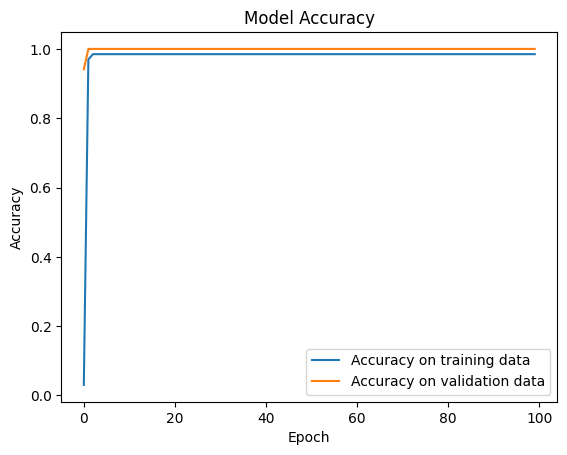

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Подготовка данных для анализа настроения
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = []
for line in texts:
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

# Максимальная длина последовательности
max_len = max([len(seq) for seq in sequences])

# Подготовка данных для обучения
sequences = np.array([np.pad(seq, (0, max_len - len(seq))) for seq in sequences])
X, y = sequences[:, :-1], sequences[:, -1]
y = to_categorical(y, num_classes=len(tokenizer.word_index) + 1)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели для анализа настроения
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=max_len - 1),
    SimpleRNN(50),
    Dense(len(tokenizer.word_index) + 1, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели и сохранение истории
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))

# График обучения
plt.plot(history.history['accuracy'], label='Accuracy on training data')
plt.plot(history.history['val_accuracy'], label='Accuracy on validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [20]:
# Assume you have new texts
new_texts = ["This is a new text for analysis.", "Another example text."]

# Convert new texts to sequences
new_sequences = []
for line in new_texts:
    encoded = tokenizer.texts_to_sequences([line])[0]
    new_sequences.append(encoded)

# Pad sequences
new_sequences = np.array([np.pad(seq, (0, max_len - len(seq))) for seq in new_sequences])

# Make predictions
predictions = model.predict(new_sequences)

# Get predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Output predicted classes
for text, predicted_class in zip(new_texts, predicted_classes):
    print(f"Text: '{text}' -> Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
Text: 'This is a new text for analysis.' -> Predicted class: 0
Text: 'Another example text.' -> Predicted class: 0



### 3. Кластеризация Текста
Для кластеризации мы будем использовать K-Means, чтобы сгруппировать тексты на основе их содержимого.



### 4. Классификация Текста
Для классификации текста на основе категорий обучим модель, аналогично анализу настроения.



Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1044 - loss: 4.2010   
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9302 - loss: 3.9884 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9690 - loss: 3.7834 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9690 - loss: 3.5364 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9690 - loss: 3.2360 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9690 - loss: 2.8561 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9690 - loss: 2.4246 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9690 - loss: 1.9501 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9768 - loss: 1.4748 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9690 - loss: 1.0935 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9690 - loss: 0.7808 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9690 - l

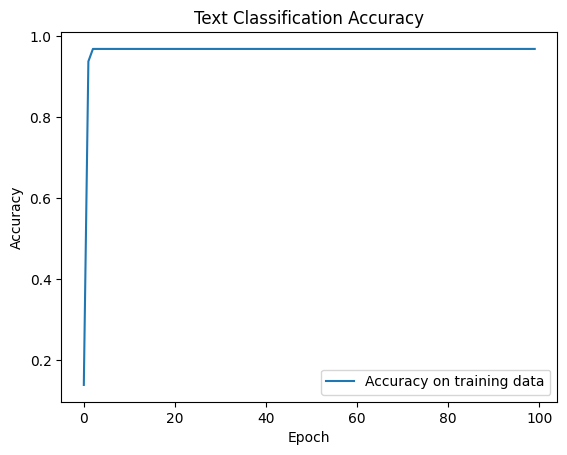

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Подготовка данных для классификации
X_train, X_test, y_train, y_test = train_test_split(texts, classification_labels, test_size=0.2, random_state=42)

# Преобразование текстов в последовательности
sequences = []
for line in X_train:
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i + 1]
        sequences.append(sequence)

# Установка максимальной длины последовательности
max_len = max(len(seq) for seq in sequences)

# Подготовка данных для обучения
sequences = np.array([np.pad(seq, (0, max_len - len(seq))) for seq in sequences])
X_class, y_class = sequences[:, :-1], sequences[:, -1]
y_class = to_categorical(y_class, num_classes=len(tokenizer.word_index) + 1)

# Создание и обучение модели
model_class = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=max_len - 1),
    SimpleRNN(50),
    Dense(len(tokenizer.word_index) + 1, activation='softmax')
])

# Компиляция и обучение модели
model_class.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_class = model_class.fit(X_class, y_class, epochs=100, verbose=1)

# График обучения
plt.plot(history_class.history['accuracy'], label='Accuracy on training data')
plt.title('Text Classification Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [22]:
# Пример предсказания
new_texts = ["A wonderful and engaging documentary"]
new_texts_sequences = tokenizer.texts_to_sequences(new_texts)

# Паддинг последовательностей
new_texts_padded = np.array([np.pad(seq, (0, max_len - len(seq))) for seq in new_texts_sequences])

# Убедитесь, что длина padded последовательностей соответствует max_len
if new_texts_padded.shape[1] != max_len:
    new_texts_padded = np.pad(new_texts_padded, ((0, 0), (0, max_len - new_texts_padded.shape[1])))

predictions = model_class.predict(new_texts_padded)

# Получение индекса предсказанной категории
predicted_index = np.argmax(predictions)

# Словарь для преобразования меток
sentiment_mapping = {
    "positive": 1,
    "negative": 0,
    "neutral": 2
}

# Обратный словарь для получения метки по индексу
reverse_sentiment_mapping = {v: k for k, v in sentiment_mapping.items()}

# Получение метки настроения
predicted_sentiment = reverse_sentiment_mapping.get(predicted_index, "Unknown category")

# Преобразование метки в числовые значения
numerical_sentiment_label = sentiment_mapping.get(predicted_sentiment, "Unknown")

print(f"Predicted Sentiment: {predicted_sentiment}")
print(f"Numerical Sentiment Label: {numerical_sentiment_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
Predicted Sentiment: negative
Numerical Sentiment Label: 0
